In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/glade/u/home/jjeffree/ensemble-analogue-predictability/')
import predictability_tools as pt

In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1,memory_limit=0)
client

<Client: 'tcp://127.0.0.1:42087' processes=1 threads=1>

In [3]:
models = ['CESM2-LE','ACCESS-ESM1-5','MPI-GE','MIROC6','CanESM5','IPSL-CM6A-L','MIROC-ES2L','GFDL-ES2M','MPI-CMIP6']
models.sort()

In [4]:
models

['ACCESS-ESM1-5',
 'CESM2-LE',
 'CanESM5',
 'GFDL-ES2M',
 'IPSL-CM6A-L',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-CMIP6',
 'MPI-GE']

In [5]:
model_name = 'ACCESS-ESM1-5'

In [5]:
r={}
for i in range(len(models)):
    model_name = models[i]
    fct = xr.open_mfdataset('/glade/work/jjeffree/results/multiindex/'+model_name+'_nomean_tos_zos/30P*30*.nc')
    r[model_name] = xr.corr(fct.verification,fct.forecast,('Y','pred_SMILE_M','lib_mi')).load()
    fct.close()
    print(model_name)

ACCESS-ESM1-5


2024-07-27 08:05:12,529 - distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
2024-07-27 08:05:13,356 - distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
2024-07-27 08:05:15,134 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)
2024-07-27 08:05:15,981 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)
2024-07-27 08:05:17,314 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)
2024-07-27 08:05:18,949 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)
2024-07-27 08:05:19,767 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)
2024-07-27 08:05:21,016 - distributed.utils_perf - WARNING - full garbage collections took

CESM2-LE


2024-07-27 08:07:45,017 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:45,695 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:46,348 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-07-27 08:07:46,704 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:47,621 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:48,857 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:50,014 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-07-27 08:07:50,931 - distributed.utils_perf - WARNING - full garbage collections took

CanESM5


2024-07-27 08:08:54,710 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)
2024-07-27 08:08:55,718 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)
2024-07-27 08:08:56,694 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)
2024-07-27 08:08:57,602 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)
2024-07-27 08:08:58,620 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)
2024-07-27 08:09:00,061 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2024-07-27 08:09:00,696 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2024-07-27 08:09:01,940 - distributed.utils_perf - WARNING - full garbage collections took

GFDL-ES2M
IPSL-CM6A-L


2024-07-27 08:10:02,115 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


MIROC-ES2L


2024-07-27 08:10:24,433 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


MIROC6


2024-07-27 08:10:44,171 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2024-07-27 08:11:01,813 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


MPI-CMIP6


2024-07-27 08:11:35,066 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-07-27 08:11:47,744 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-07-27 08:11:51,623 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


MPI-GE


In [7]:
np.array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'])

array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'], dtype='<U11')

In [8]:
for m in models:
    print(r[m].mask)

<xarray.DataArray 'mask' (mask: 9)> Size: 396B
array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'], dtype='<U11')
Coordinates:
  * mask     (mask) <U11 396B '30P0-30A' '30P0-30A30I' ... '30P30A30I' '30P30I'
<xarray.DataArray 'mask' (mask: 9)> Size: 396B
array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'], dtype='<U11')
Coordinates:
  * mask     (mask) <U11 396B '30P0-30A' '30P0-30A30I' ... '30P30A30I' '30P30I'
<xarray.DataArray 'mask' (mask: 9)> Size: 396B
array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'], dtype='<U11')
Coordinates:
  * mask     (mask) <U11 396B '30P0-30A' '30P0-30A30I' ... '30P30A30I' '30P30I'
<xarray.DataArray 'mask' (mask: 9)> Size: 396B
array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I'

In [9]:
not_calculating_that_again = xr.Dataset(r)

In [12]:
not_calculating_that_again.mask

<xarray.DataArray 'mask' (mask: 9)> Size: 396B
array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I'], dtype='<U11')
Coordinates:
  * mask     (mask) <U11 396B '30P0-30A' '30P0-30A30I' ... '30P30A30I' '30P30I'

In [13]:
not_calculating_that_again.to_netcdf('/glade/derecho/scratch/jjeffree/240725_dump_asymmetric_tropics_r.nc')

In [8]:
test = xr.load_dataset('/glade/derecho/scratch/jjeffree/240725_dump_asymmetric_tropics_r.nc')

In [11]:
test = test.assign_coords(mask=np.array(['30P0-30A', '30P0-30A30I', '30P0-30I', '30P30-0A', '30P30-0A30I',
       '30P30-0I', '30P30A', '30P30A30I', '30P30I']))

In [17]:
pt.n_ensemble_members['CESM2-LE']=100

In [12]:
def incremental_sailboat2(skill,
                    N = 40*90*7,
                    start_mask = ('30P','30P','30P'),
                    later_mask=('30P30A','30P30I','60P'),
                    skill_type='corr',
                    vlim=(-0.1,0.1),
             fig = None,
             axs = None,
             cb_axs=None,

    ):
    assert not(0 in skill.init_month), 'Month should have coordinates'
    if skill_type=='corr':
        diff_func = lambda x,y: np.tanh(np.arctanh(y)-np.arctanh(x))
        cmap = 'BrBG'
        def stat_sig(r,r1):
            S = np.sqrt(1/(N-3))

            z = (np.arctanh(r1)-np.arctanh(r))/S
            
            stat_sig = xr.ones_like(z).where(np.abs(z)>1.96)
            if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
                add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':0.8,'linestyle':'dotted'}) #I think xshift is 1st month???

            stat_sig = xr.ones_like(z).where(np.abs(z)>2.58)
            if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
                pt.add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':1,}) #I think xshift is 1st month???
        clabel0 = 'r'
        clabel = '$\Delta$r'

    elif skill_type=='mse':
        diff_func = lambda x,y: ((y-x)/x)*100
        cmap = 'BrBG_r'

        def stat_sig(r,r1):
                F = r1/r

                p_good = scipy.stats.f.cdf(r1/r,N-2,N-2)
                p_bad = scipy.stats.f.cdf(r/r1,N-2,N-2)
                p = np.min((p_good,p_bad),axis=0)
                
                stat_sig = xr.ones_like(F).where(p<0.01)
                if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
                    pt.add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':0.8,})#'linestyle':'dotted' #I think xshift is 1st month???

        clabel0 = 'MSE'
        clabel = '% MSE change'
    else:
        assert False, 'need a skill type'

    if fig is None:
        assert axs is None, 'Either pass both axs and fig or neither'
        fig, axs = plt.subplots(1,len(later_mask)+1,figsize=((len(later_mask)+1)*4,8),
                               sharex=True,sharey=True)
    elif axs is None:
        assert False, 'Either pass both axs and fig or neither'
        
    if cb_axs is None:
        cb_axs=axs

    assert len(later_mask) == len(start_mask), 'later and start mask must be paired'
    for ax_i in range(len(later_mask)):
        plt.sca(axs[ax_i])

        r = skill.sel(mask=start_mask[ax_i])
        r1 = skill.sel(mask=later_mask[ax_i])

        scatter = plt.scatter((r.init_month+r.L*0-5)%12+5,
            r.init_month*0+r.L,
            c=diff_func(r,r1),
            cmap=cmap,marker='s',s=100,vmin=vlim[0],vmax=vlim[1])
        stat_sig(r,r1)

        plt.xticks((13,16,7,10),('Jan','Apr','Jul','Oct'))
        plt.title(start_mask[ax_i]+' -> '+later_mask[ax_i])
        plt.xlabel('Initialisation month')

    fig.colorbar(scatter, ax=cb_axs,orientation='horizontal', fraction=.05,
             extend='both',label = clabel,aspect=20*len(later_mask))
    return axs

In [15]:
r = test

NameError: name 'add_iso_line' is not defined

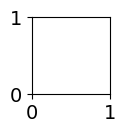

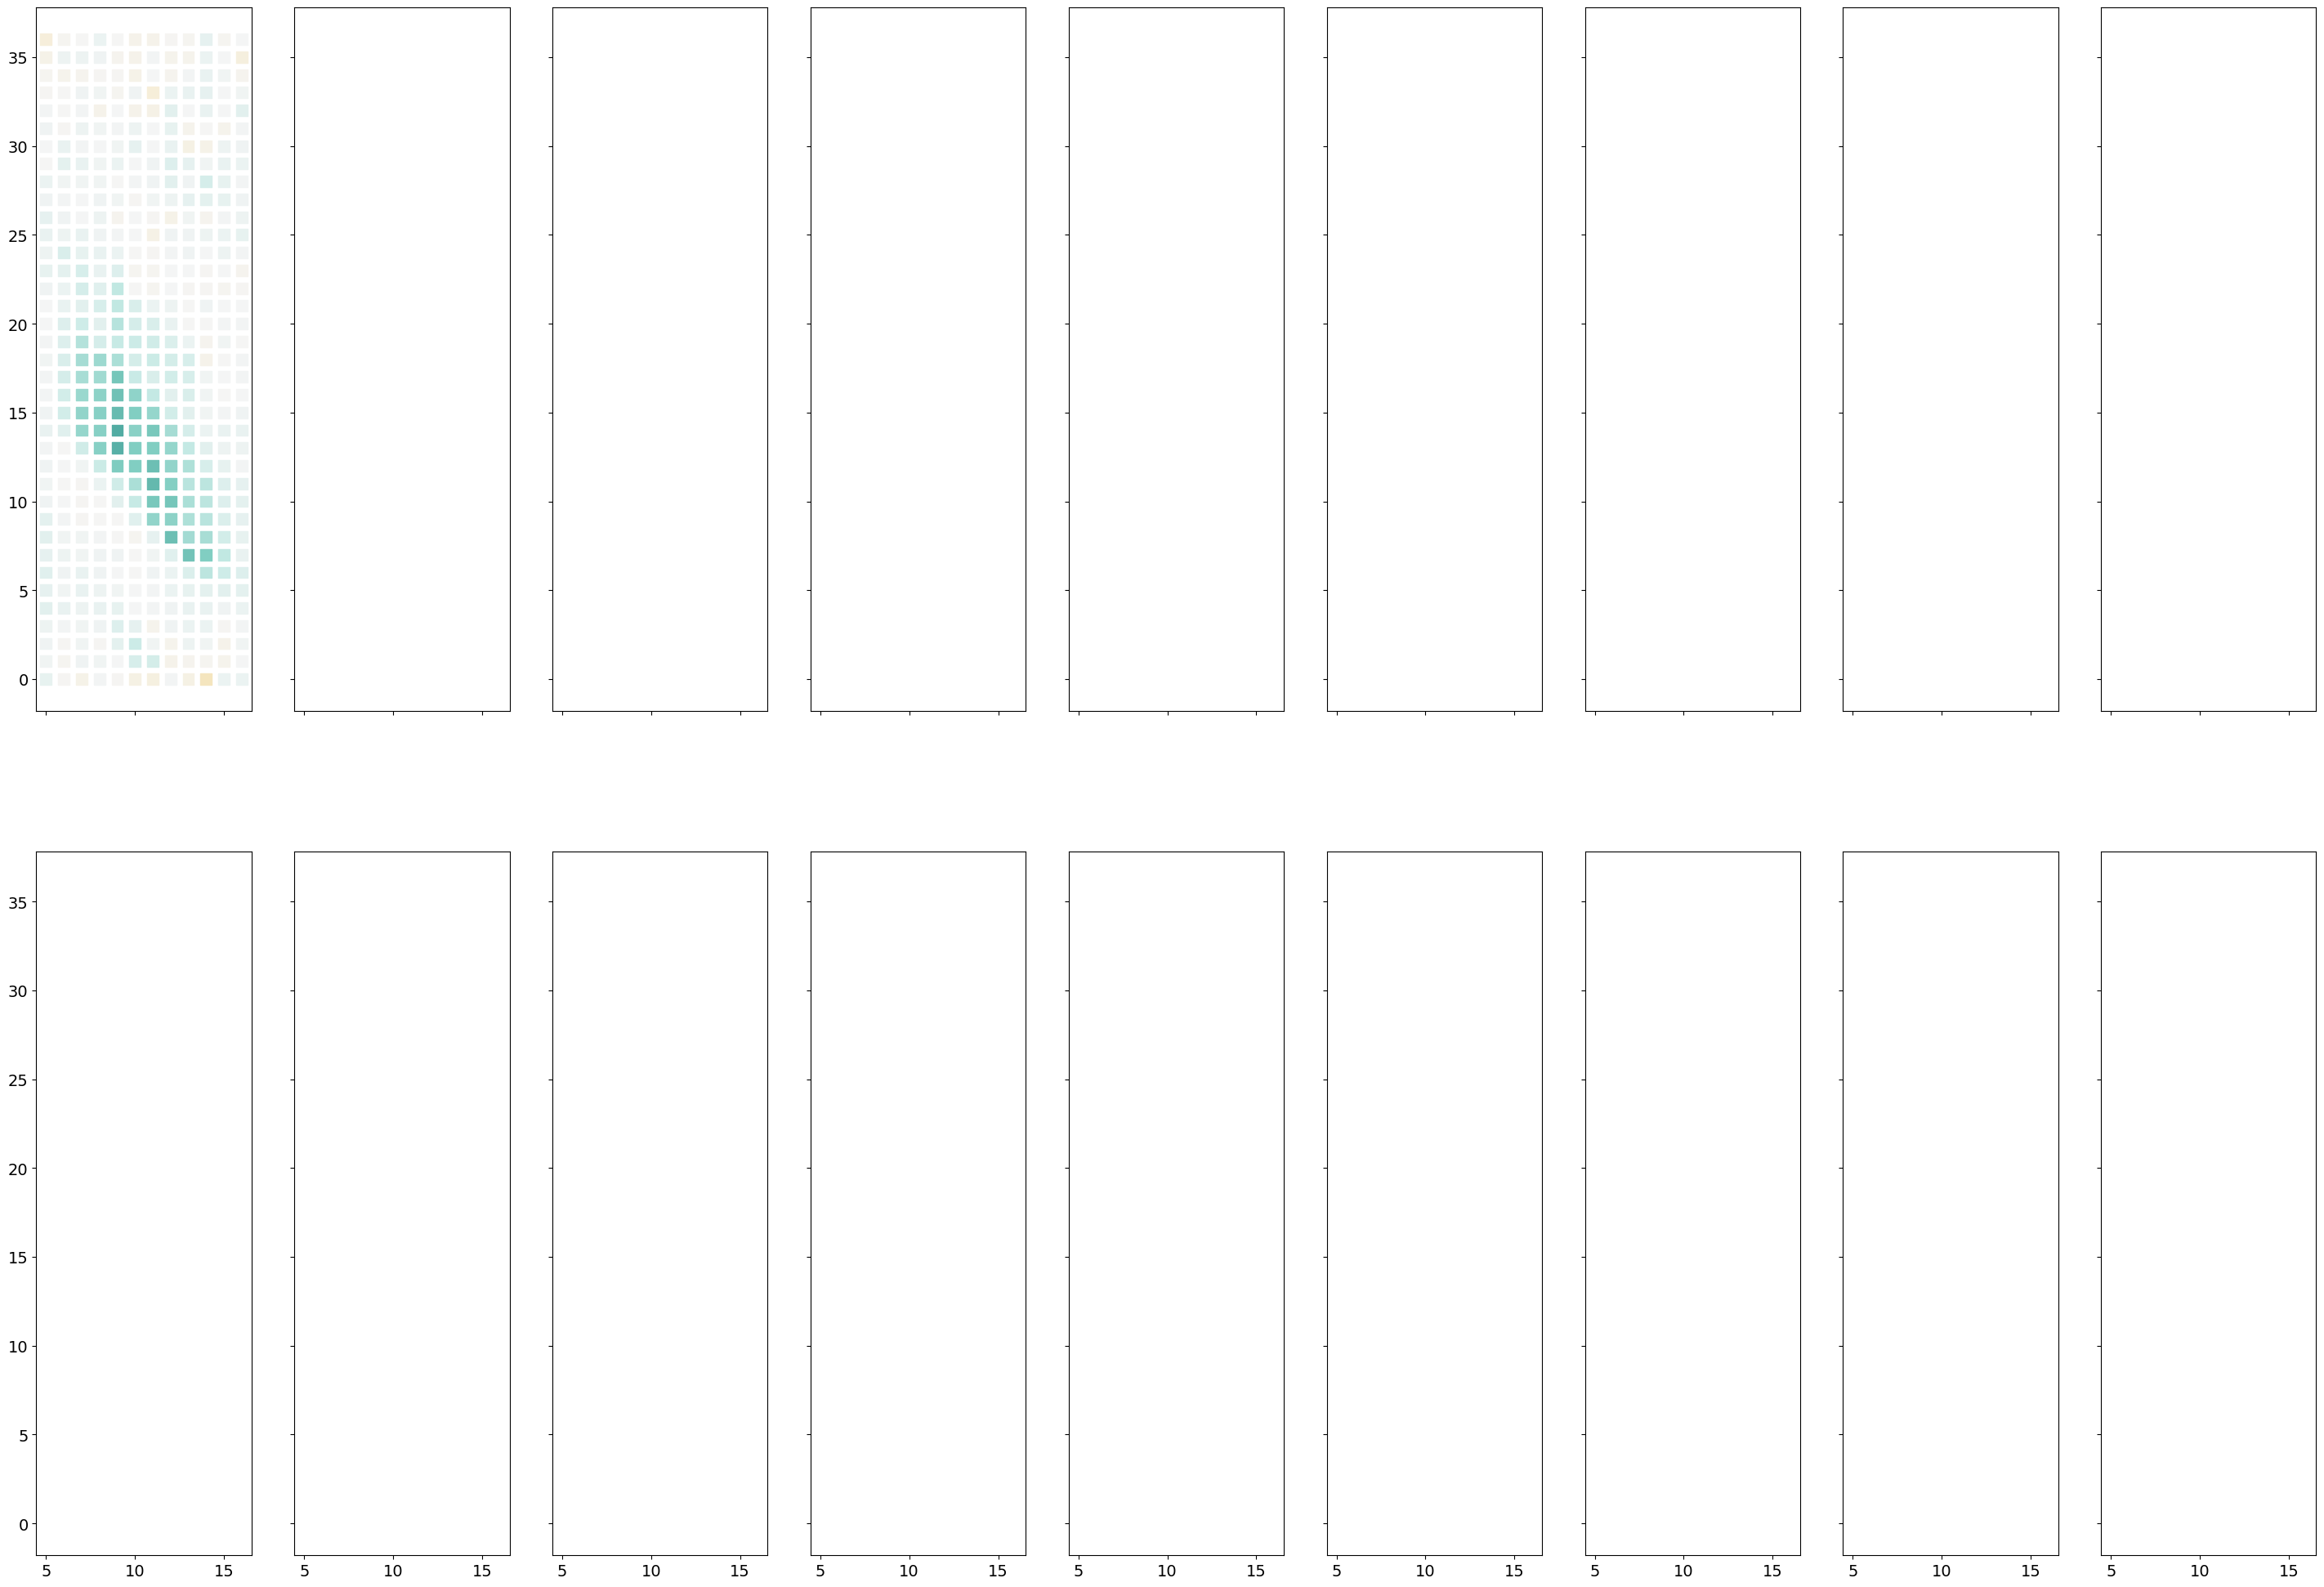

In [16]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    incremental_sailboat2(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P30A','30P0-30A30I'),
                     later_mask=('30P30A30I','30P30A30I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title,size=24)
    axs[1,i].set_xticks([7,13],['Jul','Jan'],size=32)
axs[0,0].set_ylabel('Indian Ocean (with Atl)\n\nlead time (months)',size=32)
axs[1,0].set_ylabel('S Atl (with Ind & N Atl) \n\n lead time (months)',size=32)
#plt.savefig('bonus_indian_a.pdf')

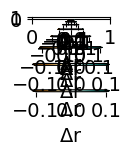

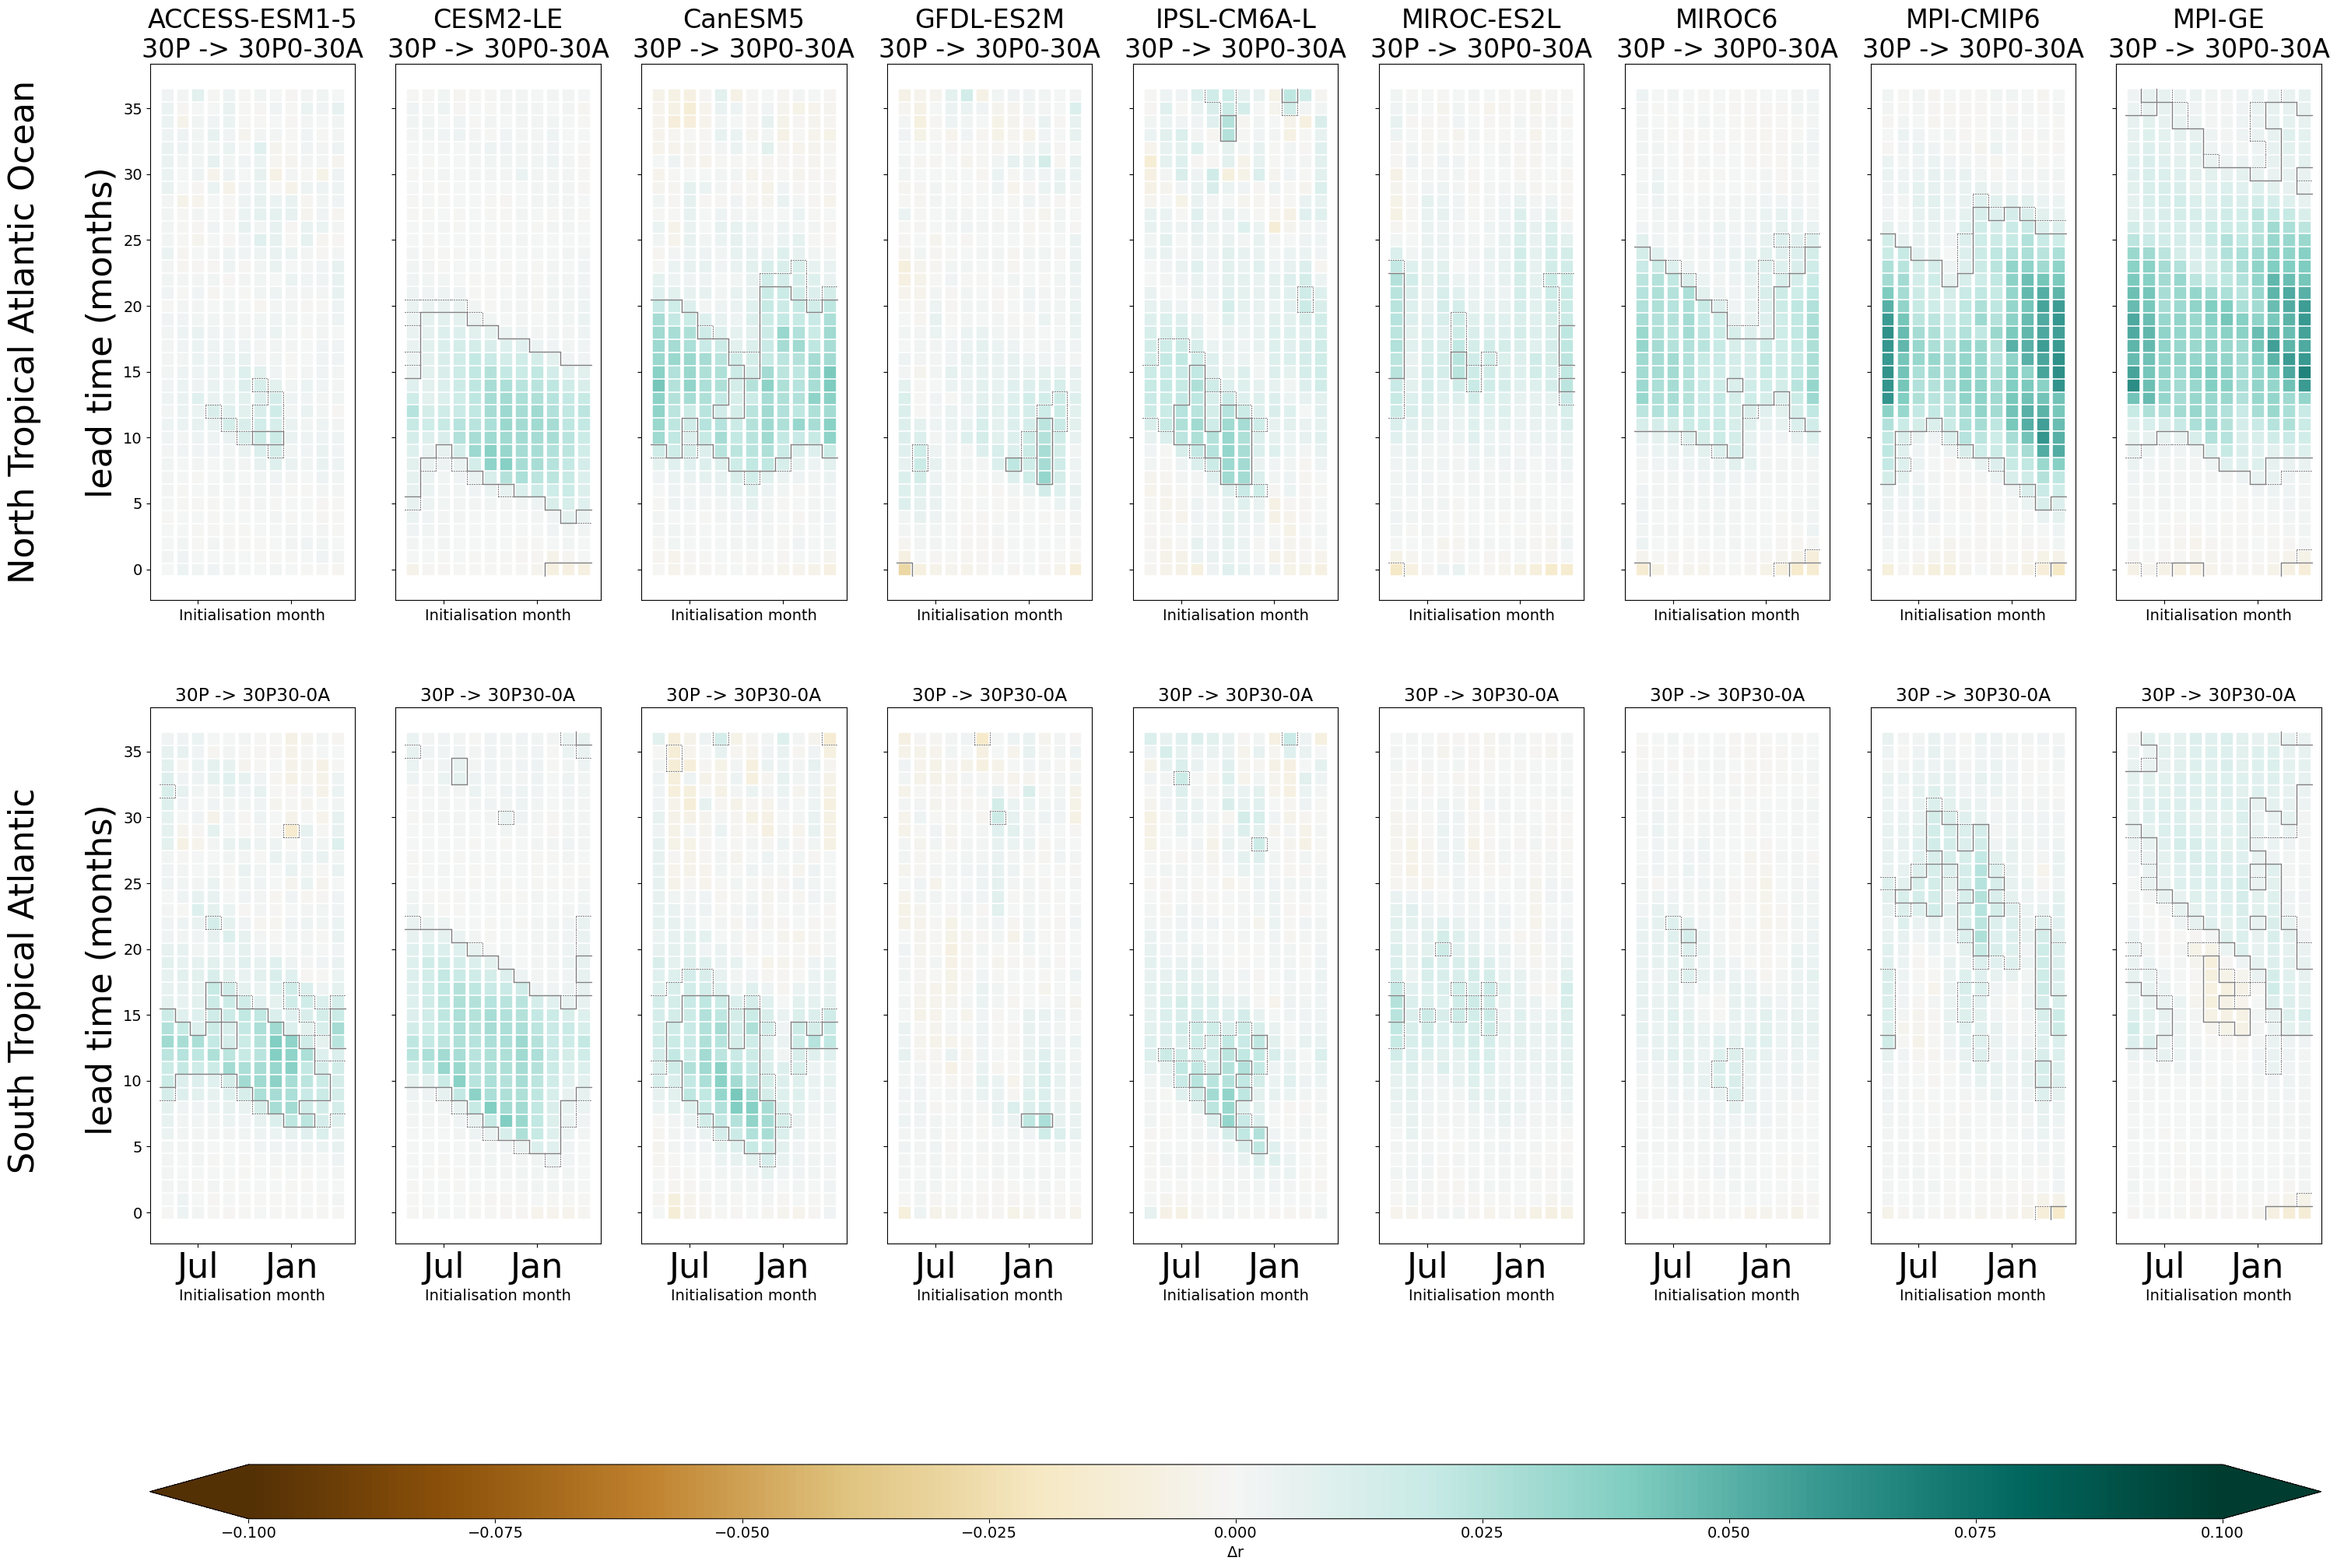

In [13]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P','30P'),
                     later_mask=('30P0-30A','30P30-0A'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title,size=24)
    axs[1,i].set_xticks([7,13],['Jul','Jan'],size=32)
axs[0,0].set_ylabel('North Tropical Atlantic Ocean\n\nlead time (months)',size=32)
axs[1,0].set_ylabel('South Tropical Atlantic \n\n lead time (months)',size=32)
plt.savefig('asymmetric_atlantic.pdf')

In [9]:
r

<xarray.Dataset> Size: 768kB
Dimensions:        (mask: 8, index_lon: 3, L: 37, init_month: 12)
Coordinates:
  * mask           (mask) <U3 96B '30P' '30P' '30P' '30P' ... '30P' '30P' '30P'
  * index_lon      (index_lon) <U6 72B 'nino3' 'nino34' 'nino4'
  * L              (L) int64 296B 0 1 2 3 4 5 6 7 8 ... 29 30 31 32 33 34 35 36
  * init_month     (init_month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    ACCESS-ESM1-5  (mask, index_lon, init_month, L) float64 85kB 0.9881 ... 0...
    CESM2-LE       (mask, index_lon, init_month, L) float64 85kB 0.9862 ... 0...
    CanESM5        (mask, index_lon, init_month, L) float64 85kB 0.9735 ... 0...
    GFDL-ES2M      (mask, index_lon, init_month, L) float64 85kB 0.9893 ... 0...
    IPSL-CM6A-L    (mask, index_lon, init_month, L) float64 85kB 0.9862 ... 0...
    MIROC-ES2L     (mask, index_lon, init_month, L) float64 85kB 0.9842 ... 0...
    MIROC6         (mask, index_lon, init_month, L) float64 85kB 0.98 ... 0.368
    MPI-CMIP6      (mask, index_lon, init_month, L) float64 85kB 0.9764 ... 0...
    MPI-GE         (mask, index_lon, init_month, L) float64 85kB 0.9719 ... 0...

KeyError: "not all values found in index 'mask'. Try setting the `method` keyword argument (example: method='nearest')."

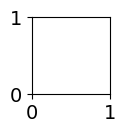

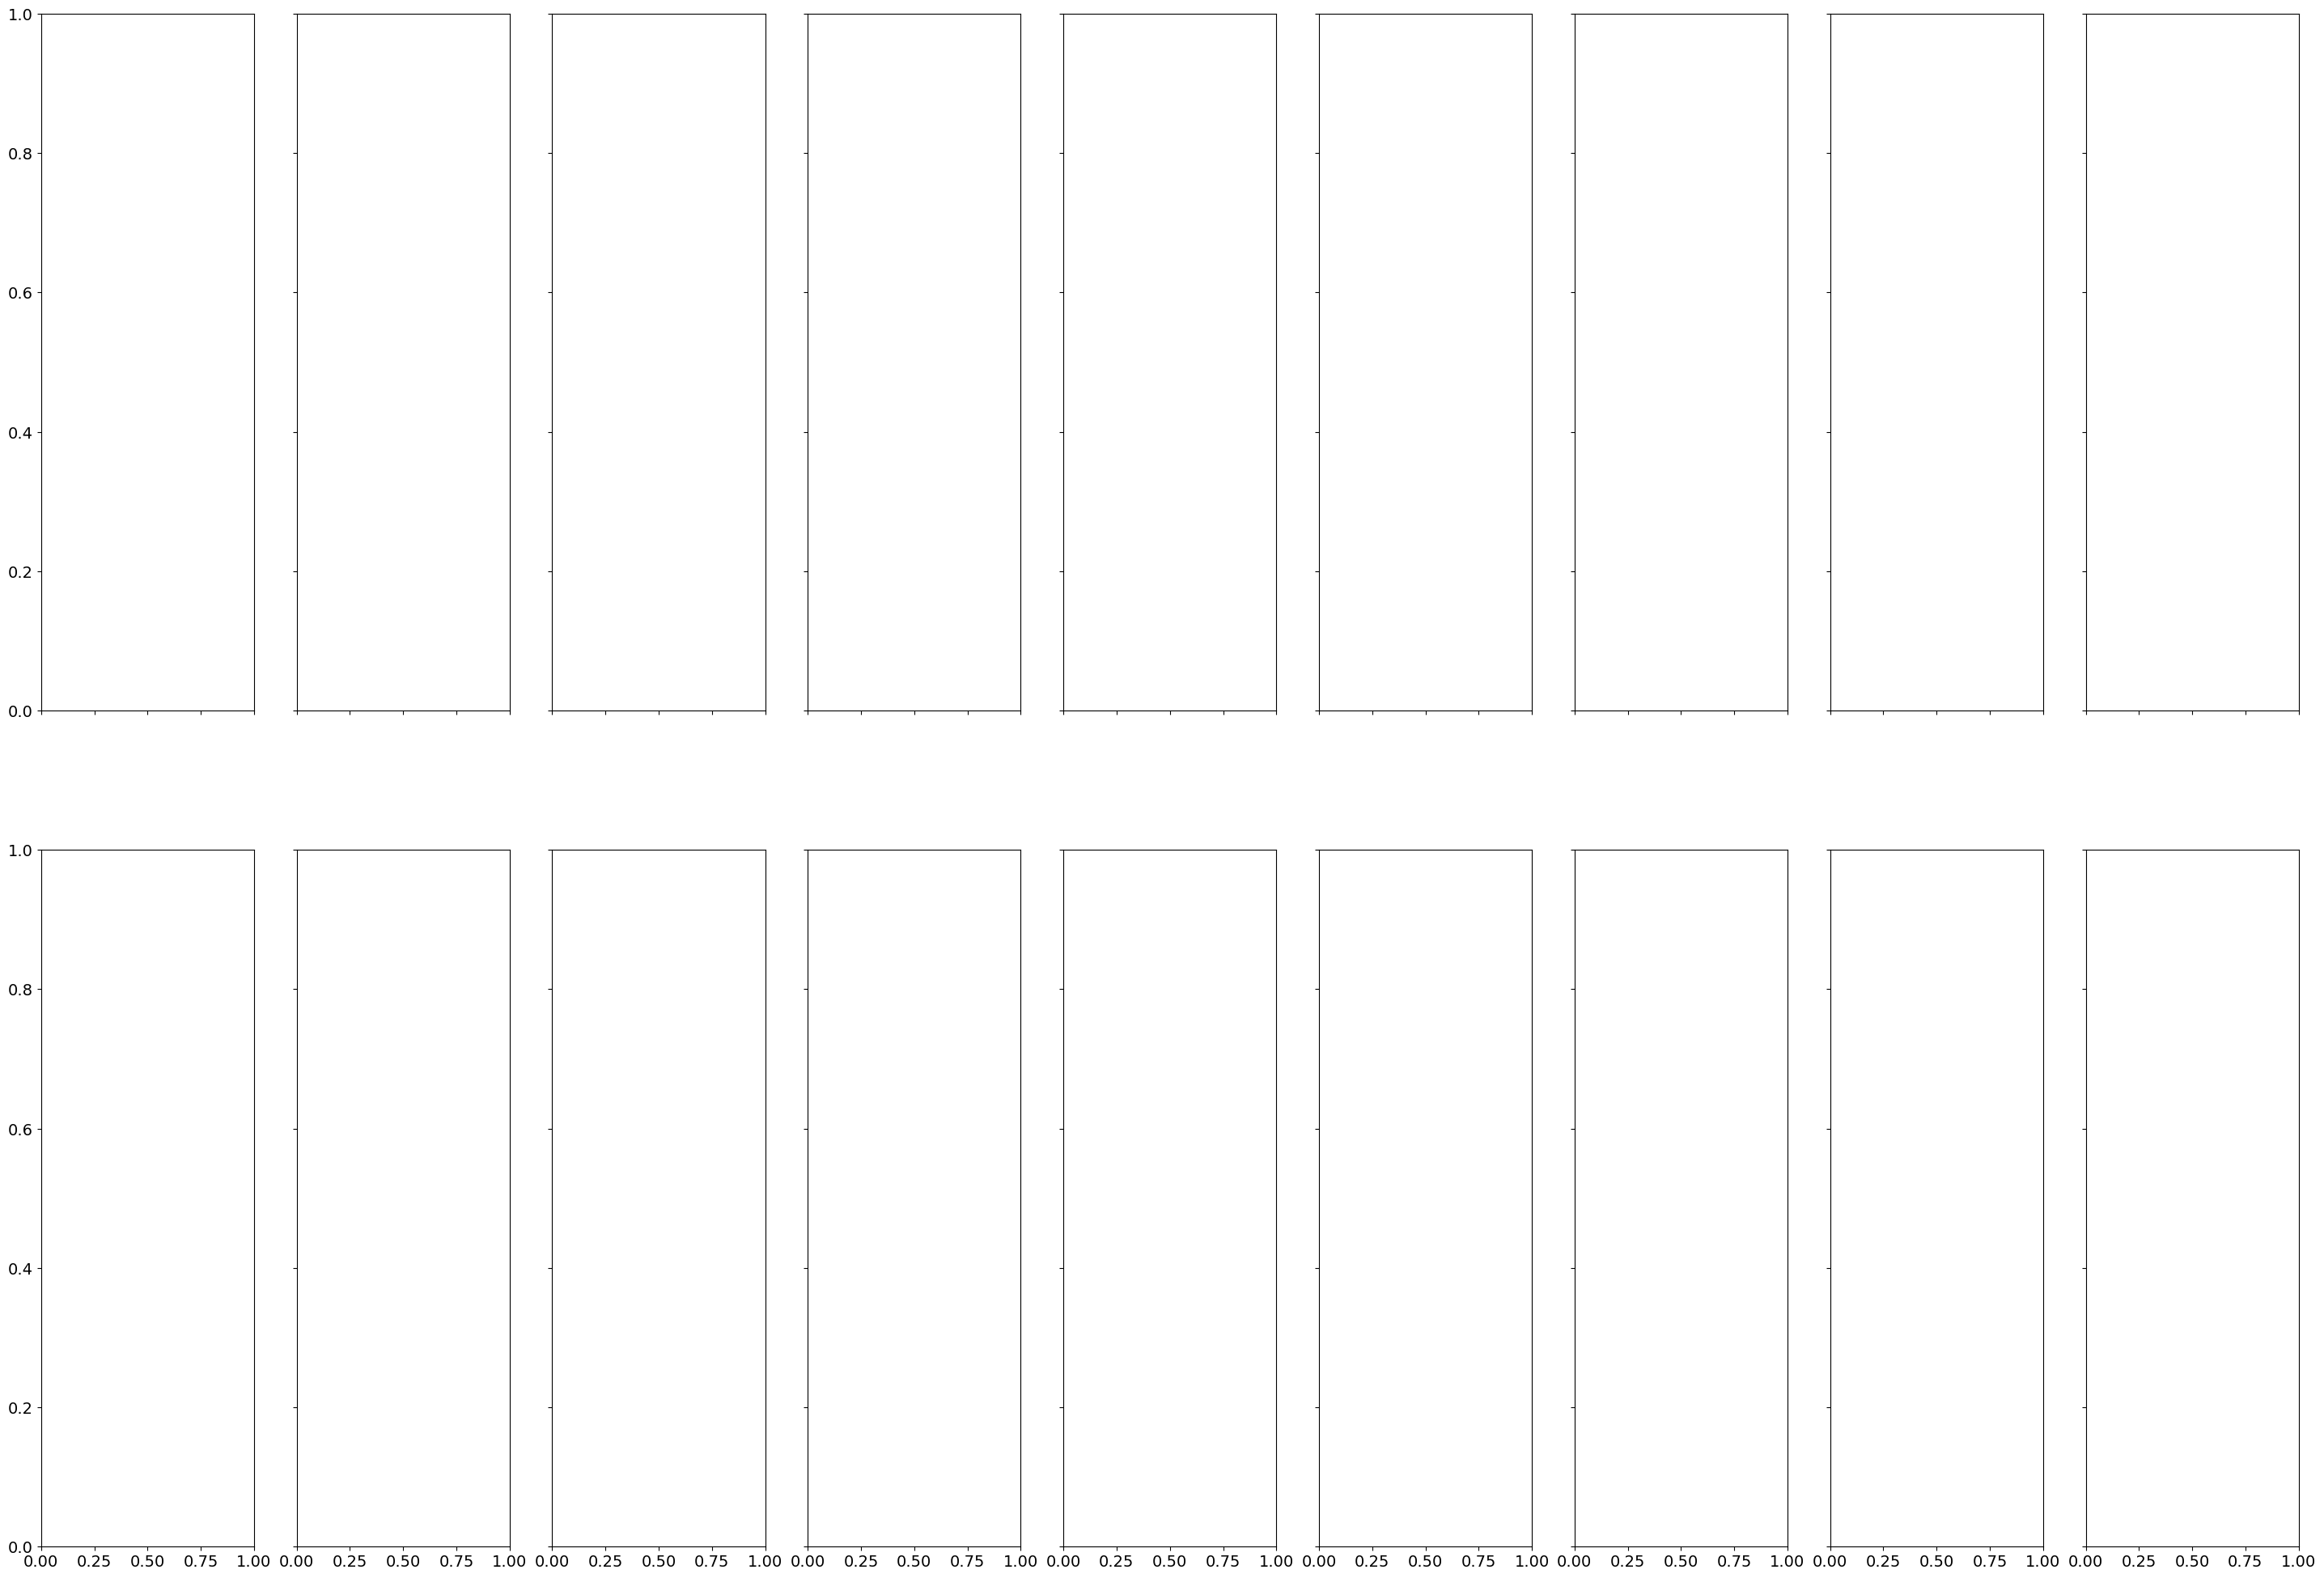

In [7]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P30-0A','30P0-30A'),
                     later_mask=('30P30A','30P30A'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title,size=24)
    axs[1,i].set_xticks([7,13],['Jul','Jan'],size=32)
axs[0,0].set_ylabel('North Tropical Atlantic Ocean\n\nlead time (months)',size=32)
axs[1,0].set_ylabel('South Tropical Atlantic \n\n lead time (months)',size=32)
plt.savefig('asymmetric_atlantic2.pdf')

2024-07-25 01:23:59,694 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


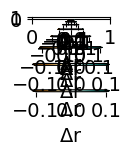

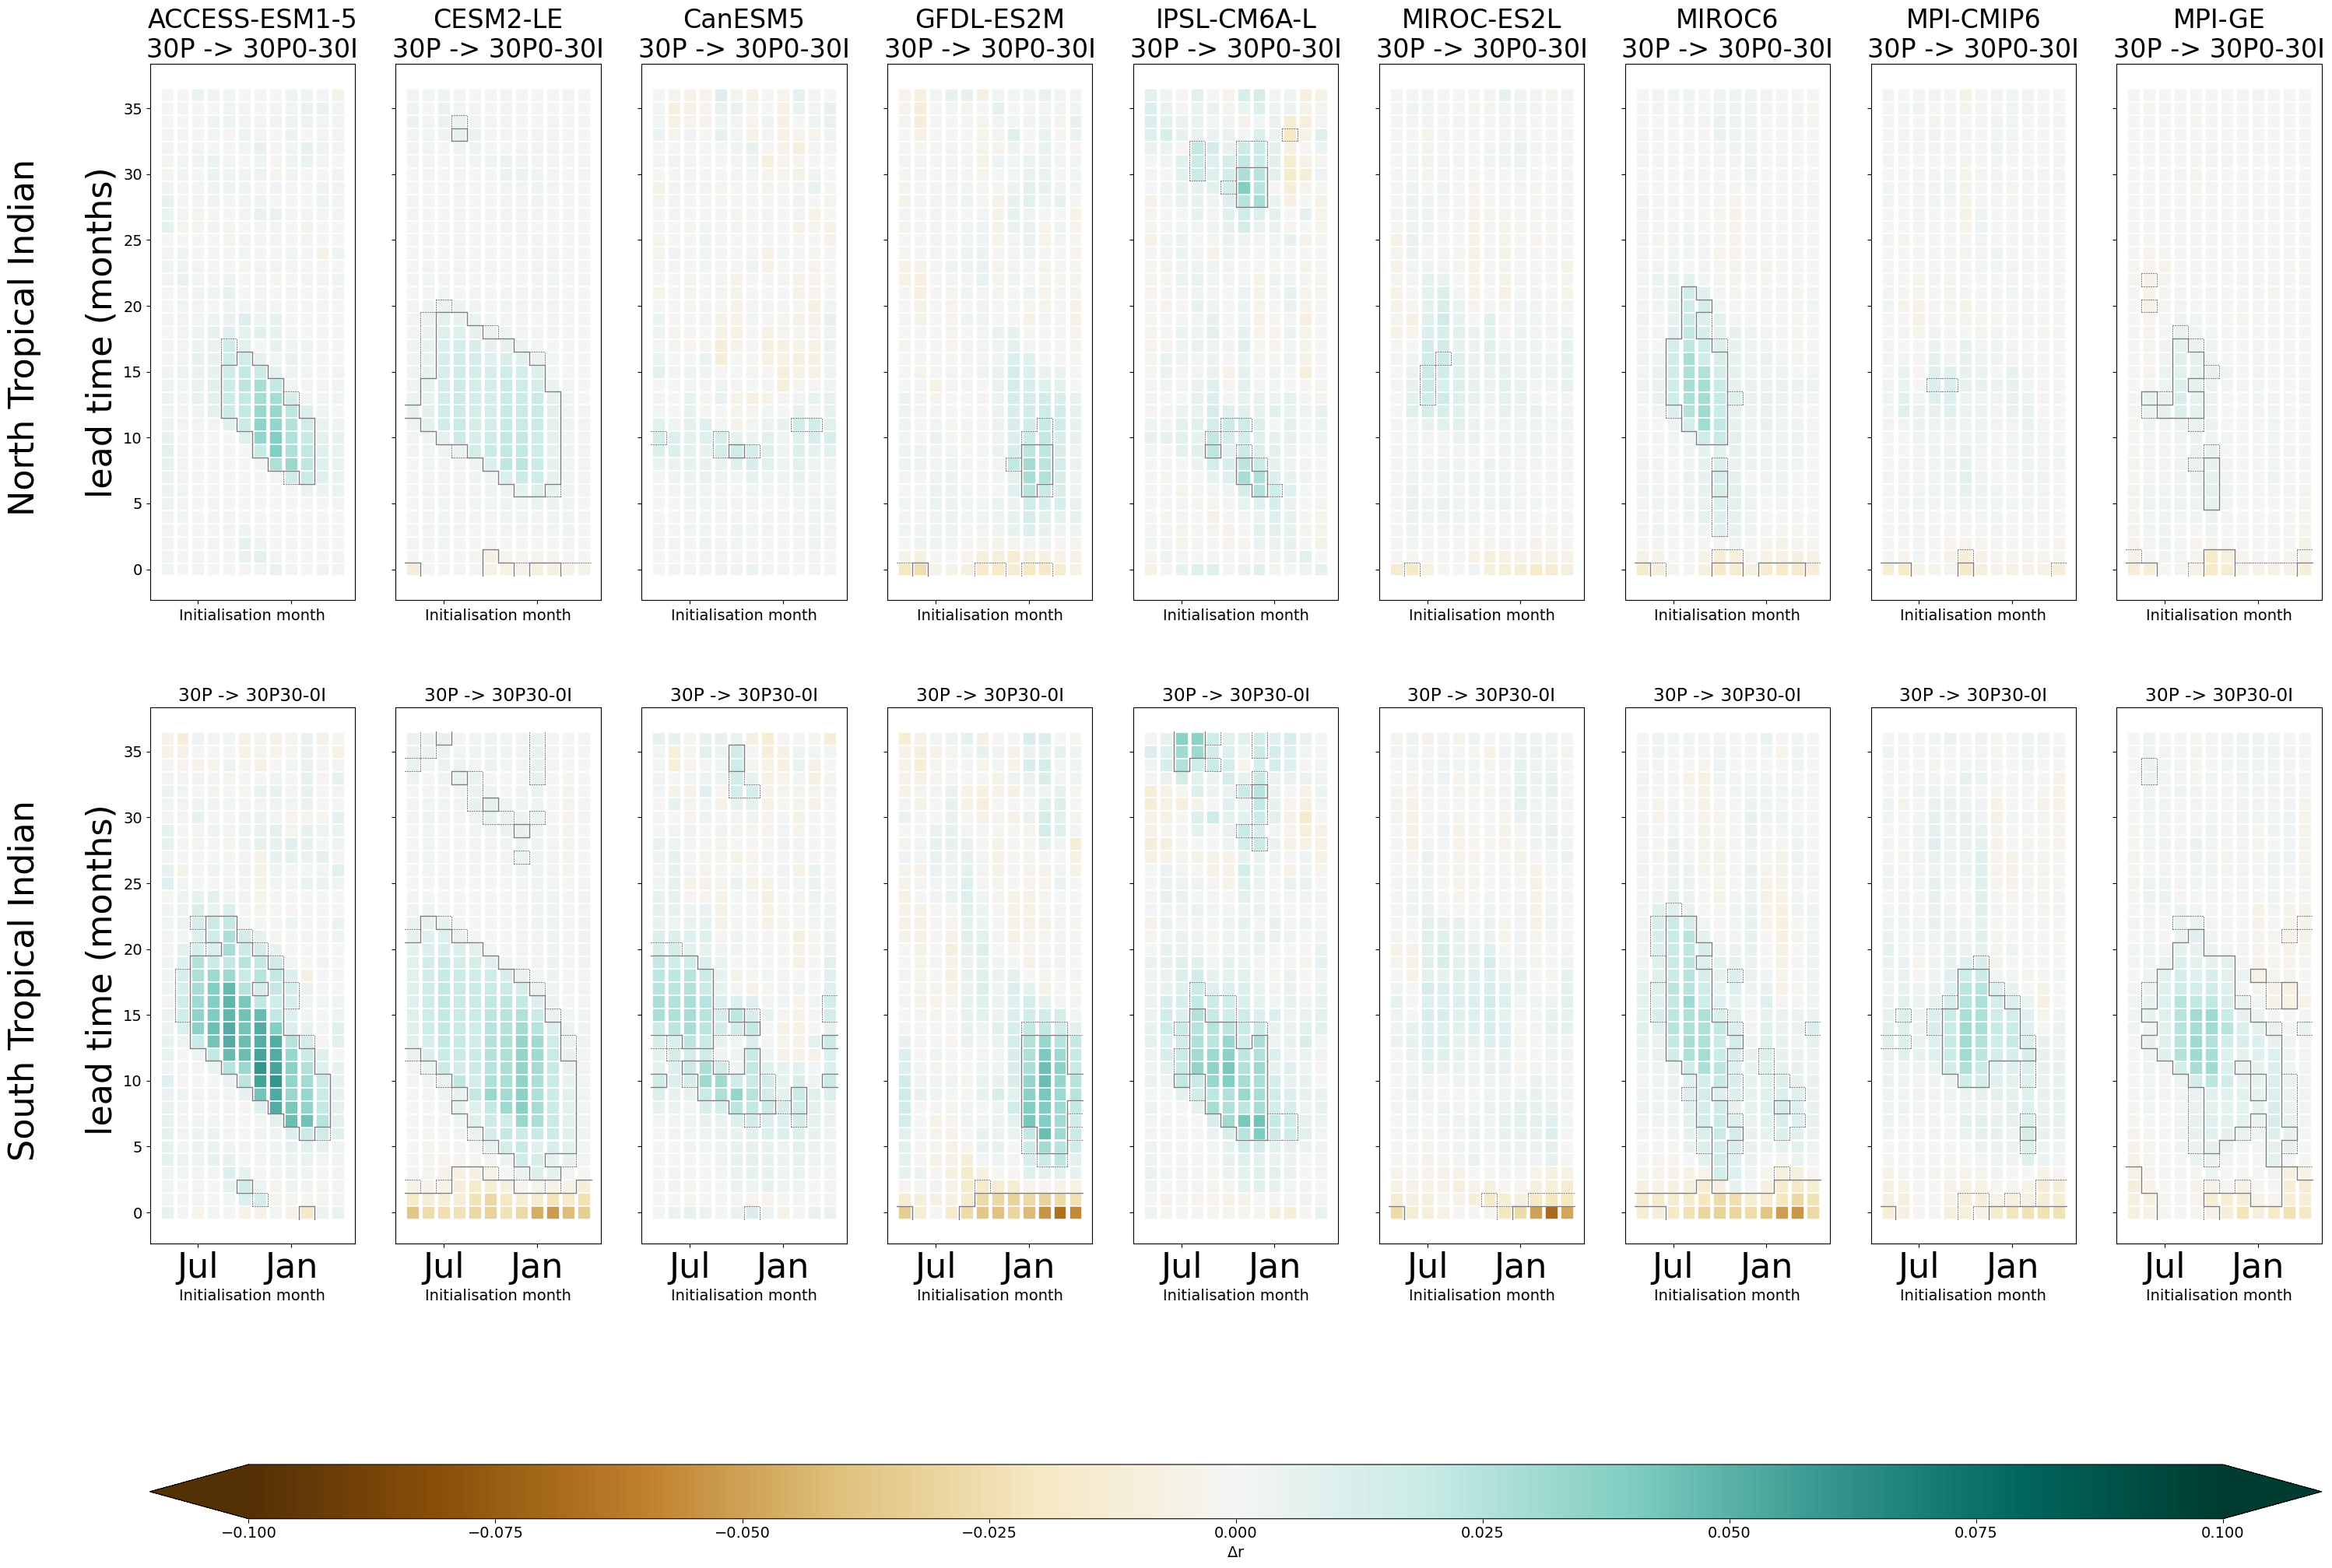

In [8]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P','30P'),
                     later_mask=('30P0-30I','30P30-0I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title,size=24)
    axs[1,i].set_xticks([7,13],['Jul','Jan'],size=32)
axs[0,0].set_ylabel('North Tropical Indian \n\nlead time (months)',size=32)
axs[1,0].set_ylabel('South Tropical Indian \n\n lead time (months)',size=32)
plt.savefig('asymmetric_indian.pdf')

2024-07-24 23:30:22,038 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


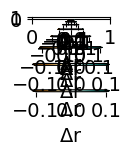

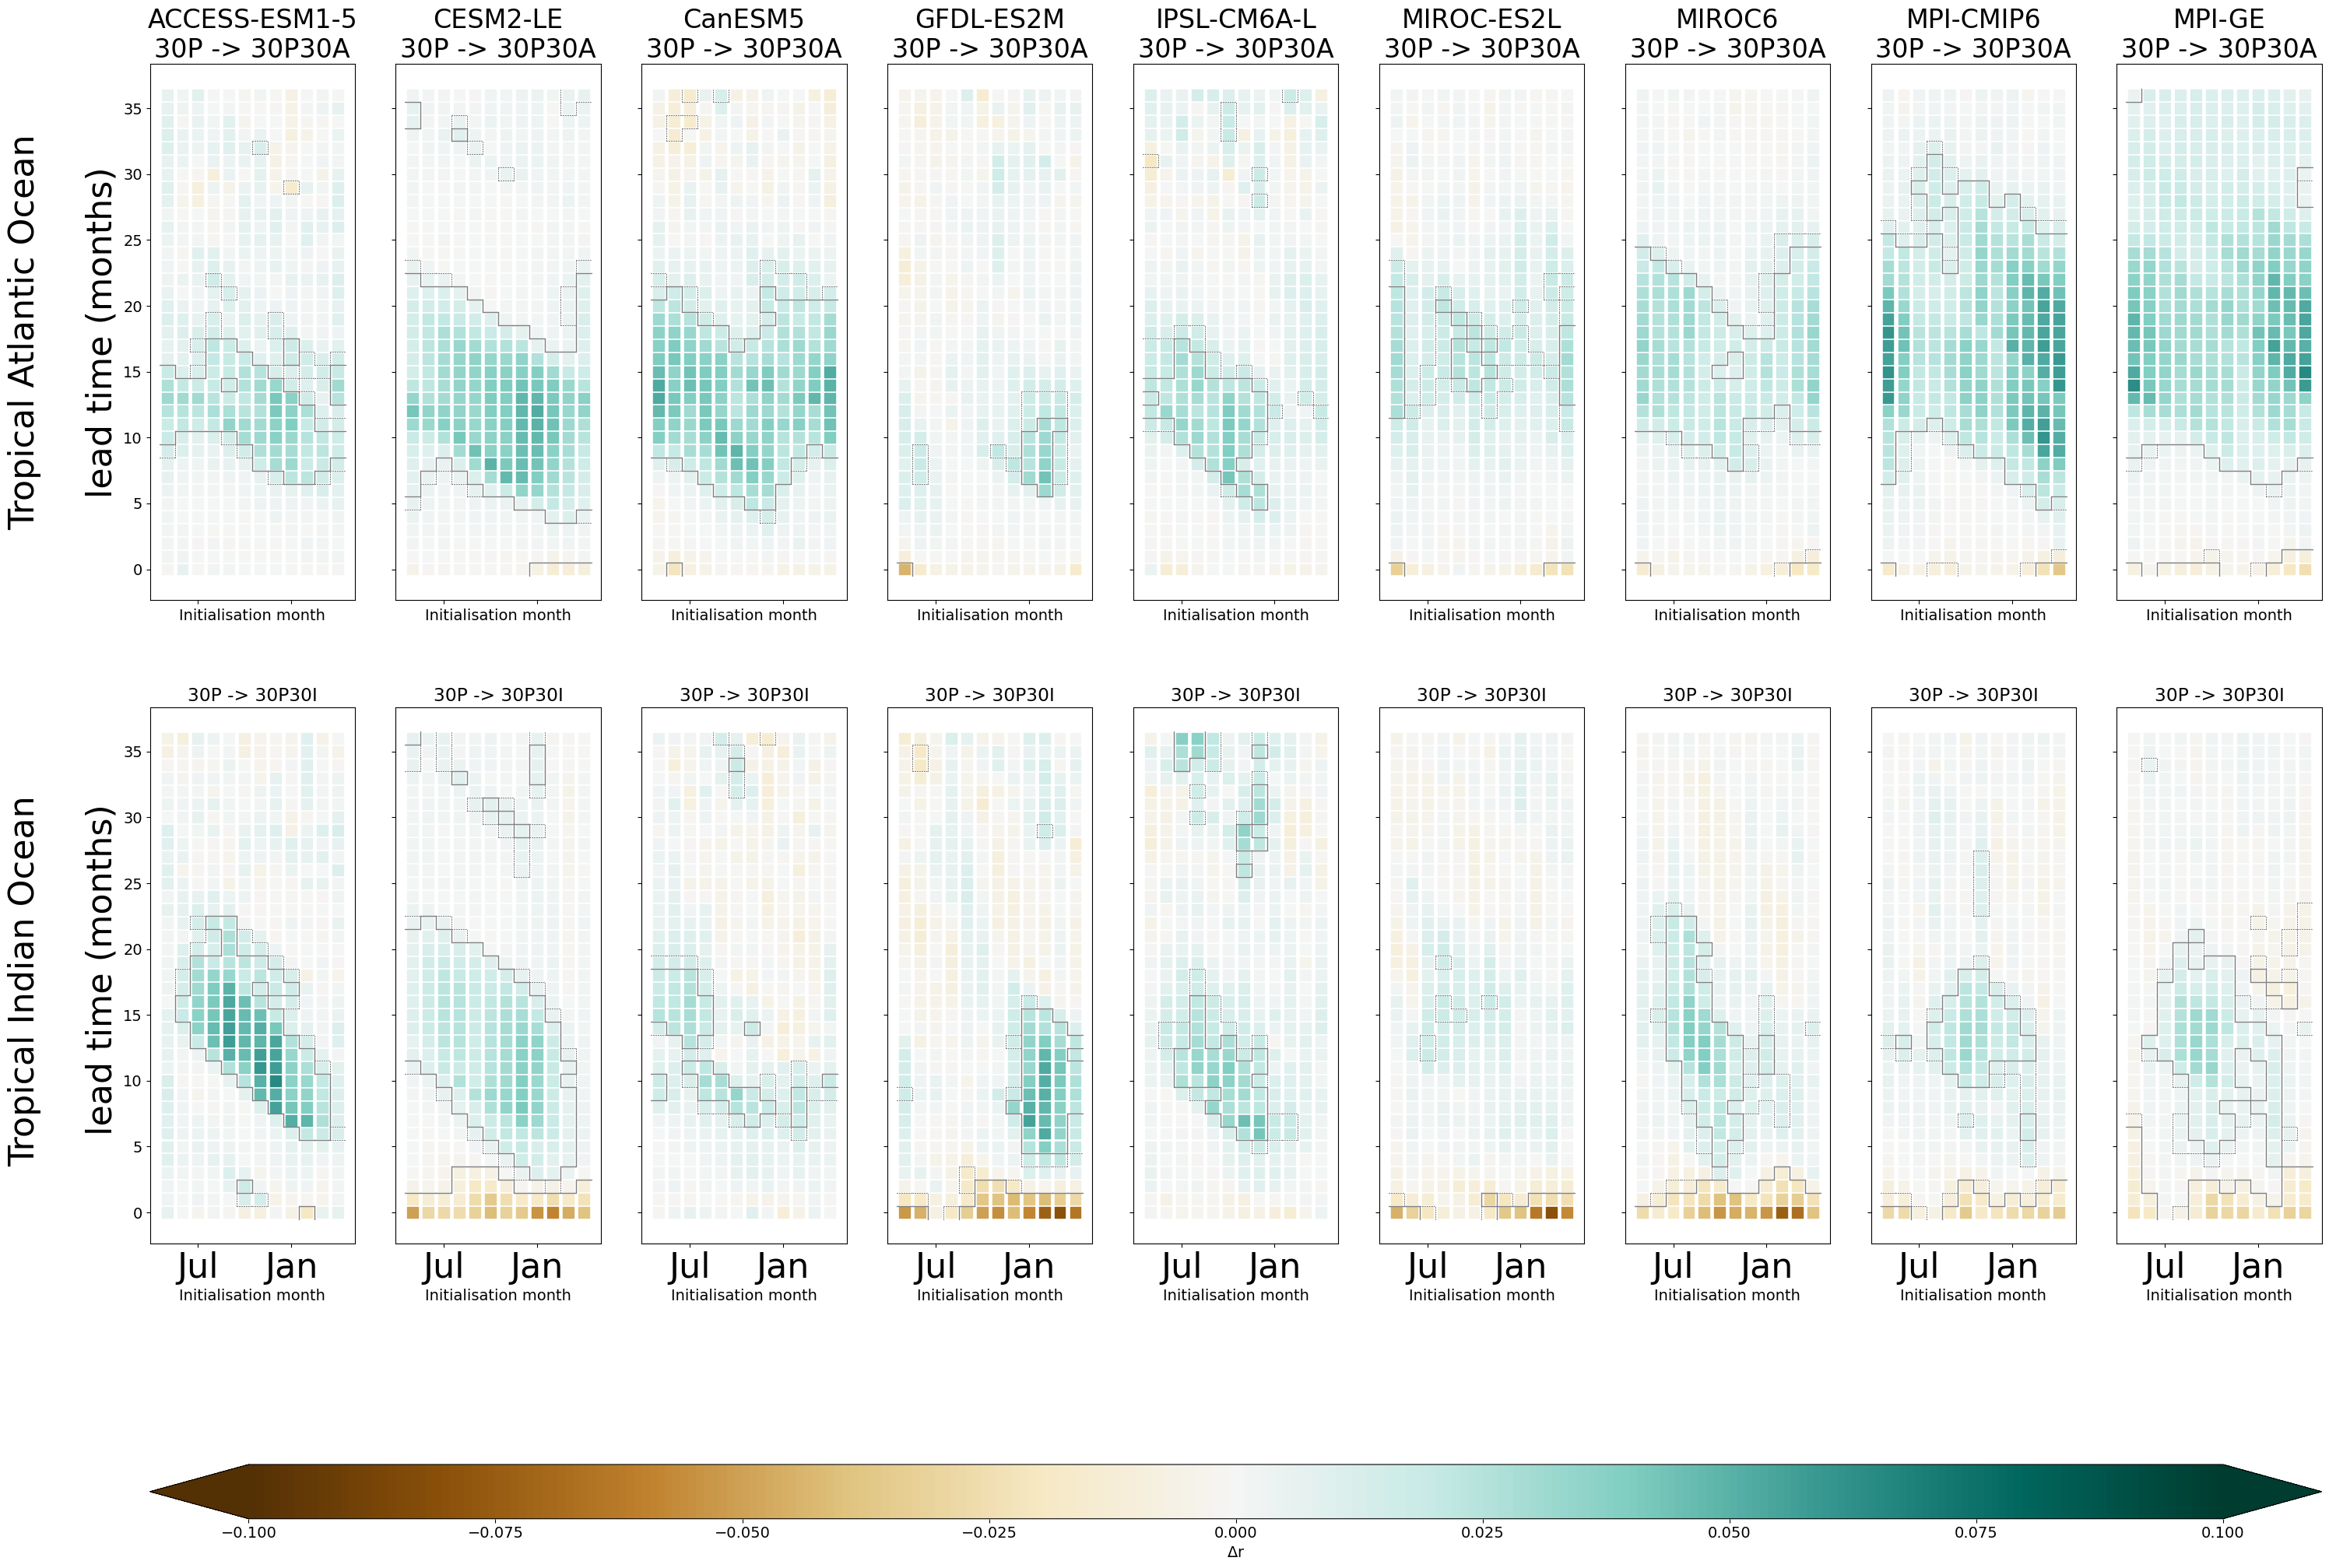

In [14]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P','30P'),
                     later_mask=('30P30A','30P30I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title,size=24)
    axs[1,i].set_xticks([7,13],['Jul','Jan'],size=32)
axs[0,0].set_ylabel('Tropical Atlantic Ocean\n\nlead time (months)',size=32)
axs[1,0].set_ylabel('Tropical Indian Ocean \n\n lead time (months)',size=32)
plt.savefig('tropics.pdf')

In [ ]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=6
h=3
fig, axs = plt.subplots(h,n,figsize=(n*4,8.2*h*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(('ACCESS-ESM1-5','CanESM5','GFDL-ES2M','IPSL-CM6A-L','MIROC6','MPI-CMIP6',)):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('2P','2P','2P'),
                     later_mask=('10-2P','2-10P','10P'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title)
axs[0,0].set_ylabel('Adding 2°-10°S \n\n lead time (months)',size=16)
axs[1,0].set_ylabel('Adding 2°-10°N \n\n lead time (months)',size=16)
axs[2,0].set_ylabel('Adding 2°-10° S & N \n\n lead time (months)',size=16)
plt.savefig('asymmetric_pacific_small.pdf')

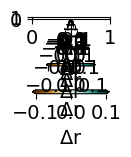

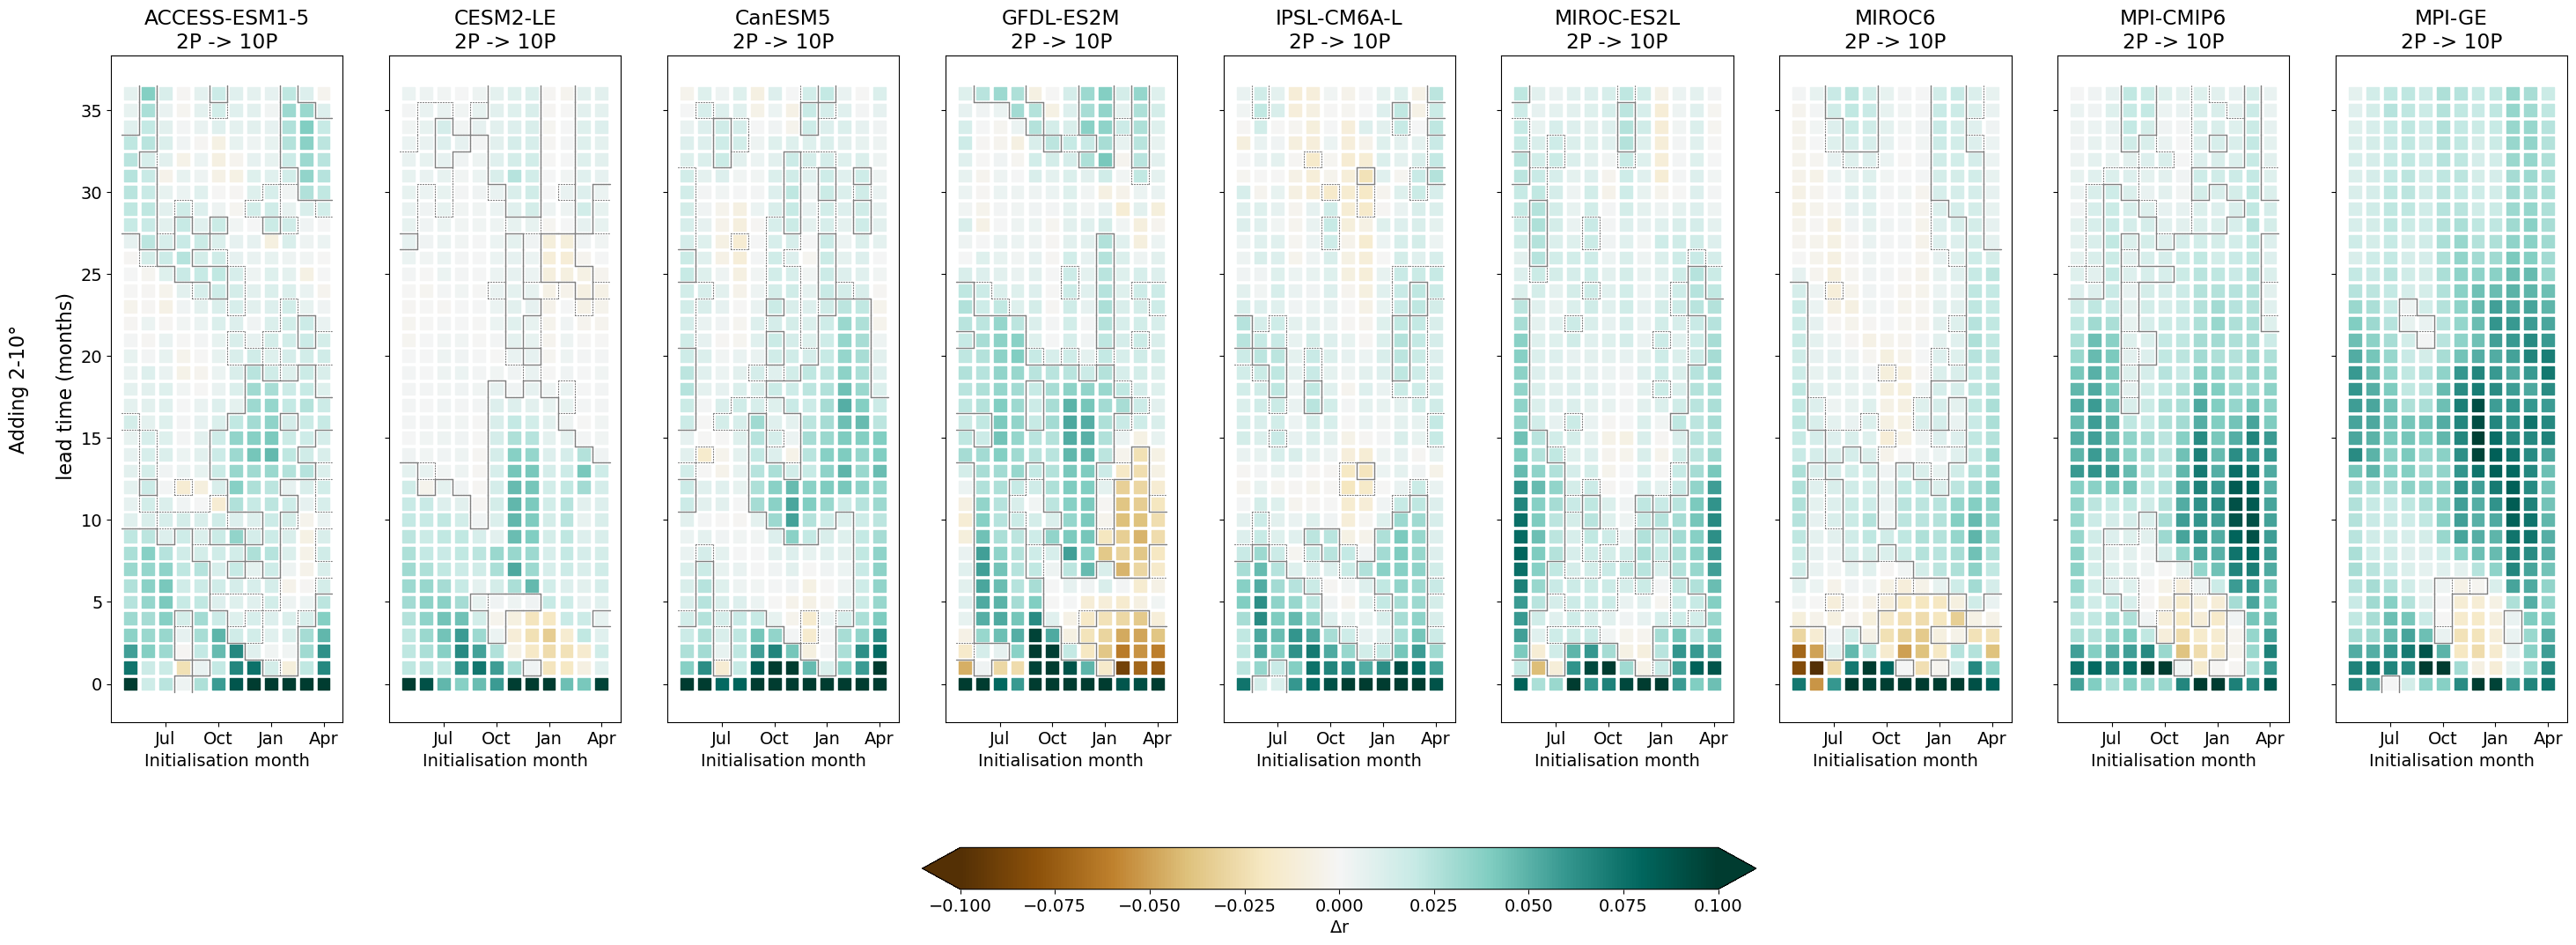

In [76]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
h=1
fig, axs = plt.subplots(h,n,figsize=(n*4,8.2*h*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs
    else:
        cb_axs=(phantom_ax,phantom_ax)

    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('2P',),
                     later_mask=('10P',),
                     fig=fig,axs=[axs[i]],cb_axs=cb_axs)
    old_title = axs[i].get_title()
    axs[i].set_title(model_name+'\n'+old_title)
axs[0].set_ylabel('Adding 2-10°\n\n lead time (months)',size=16)
plt.savefig('symmetric_smallP.pdf')

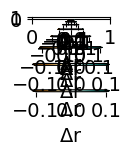

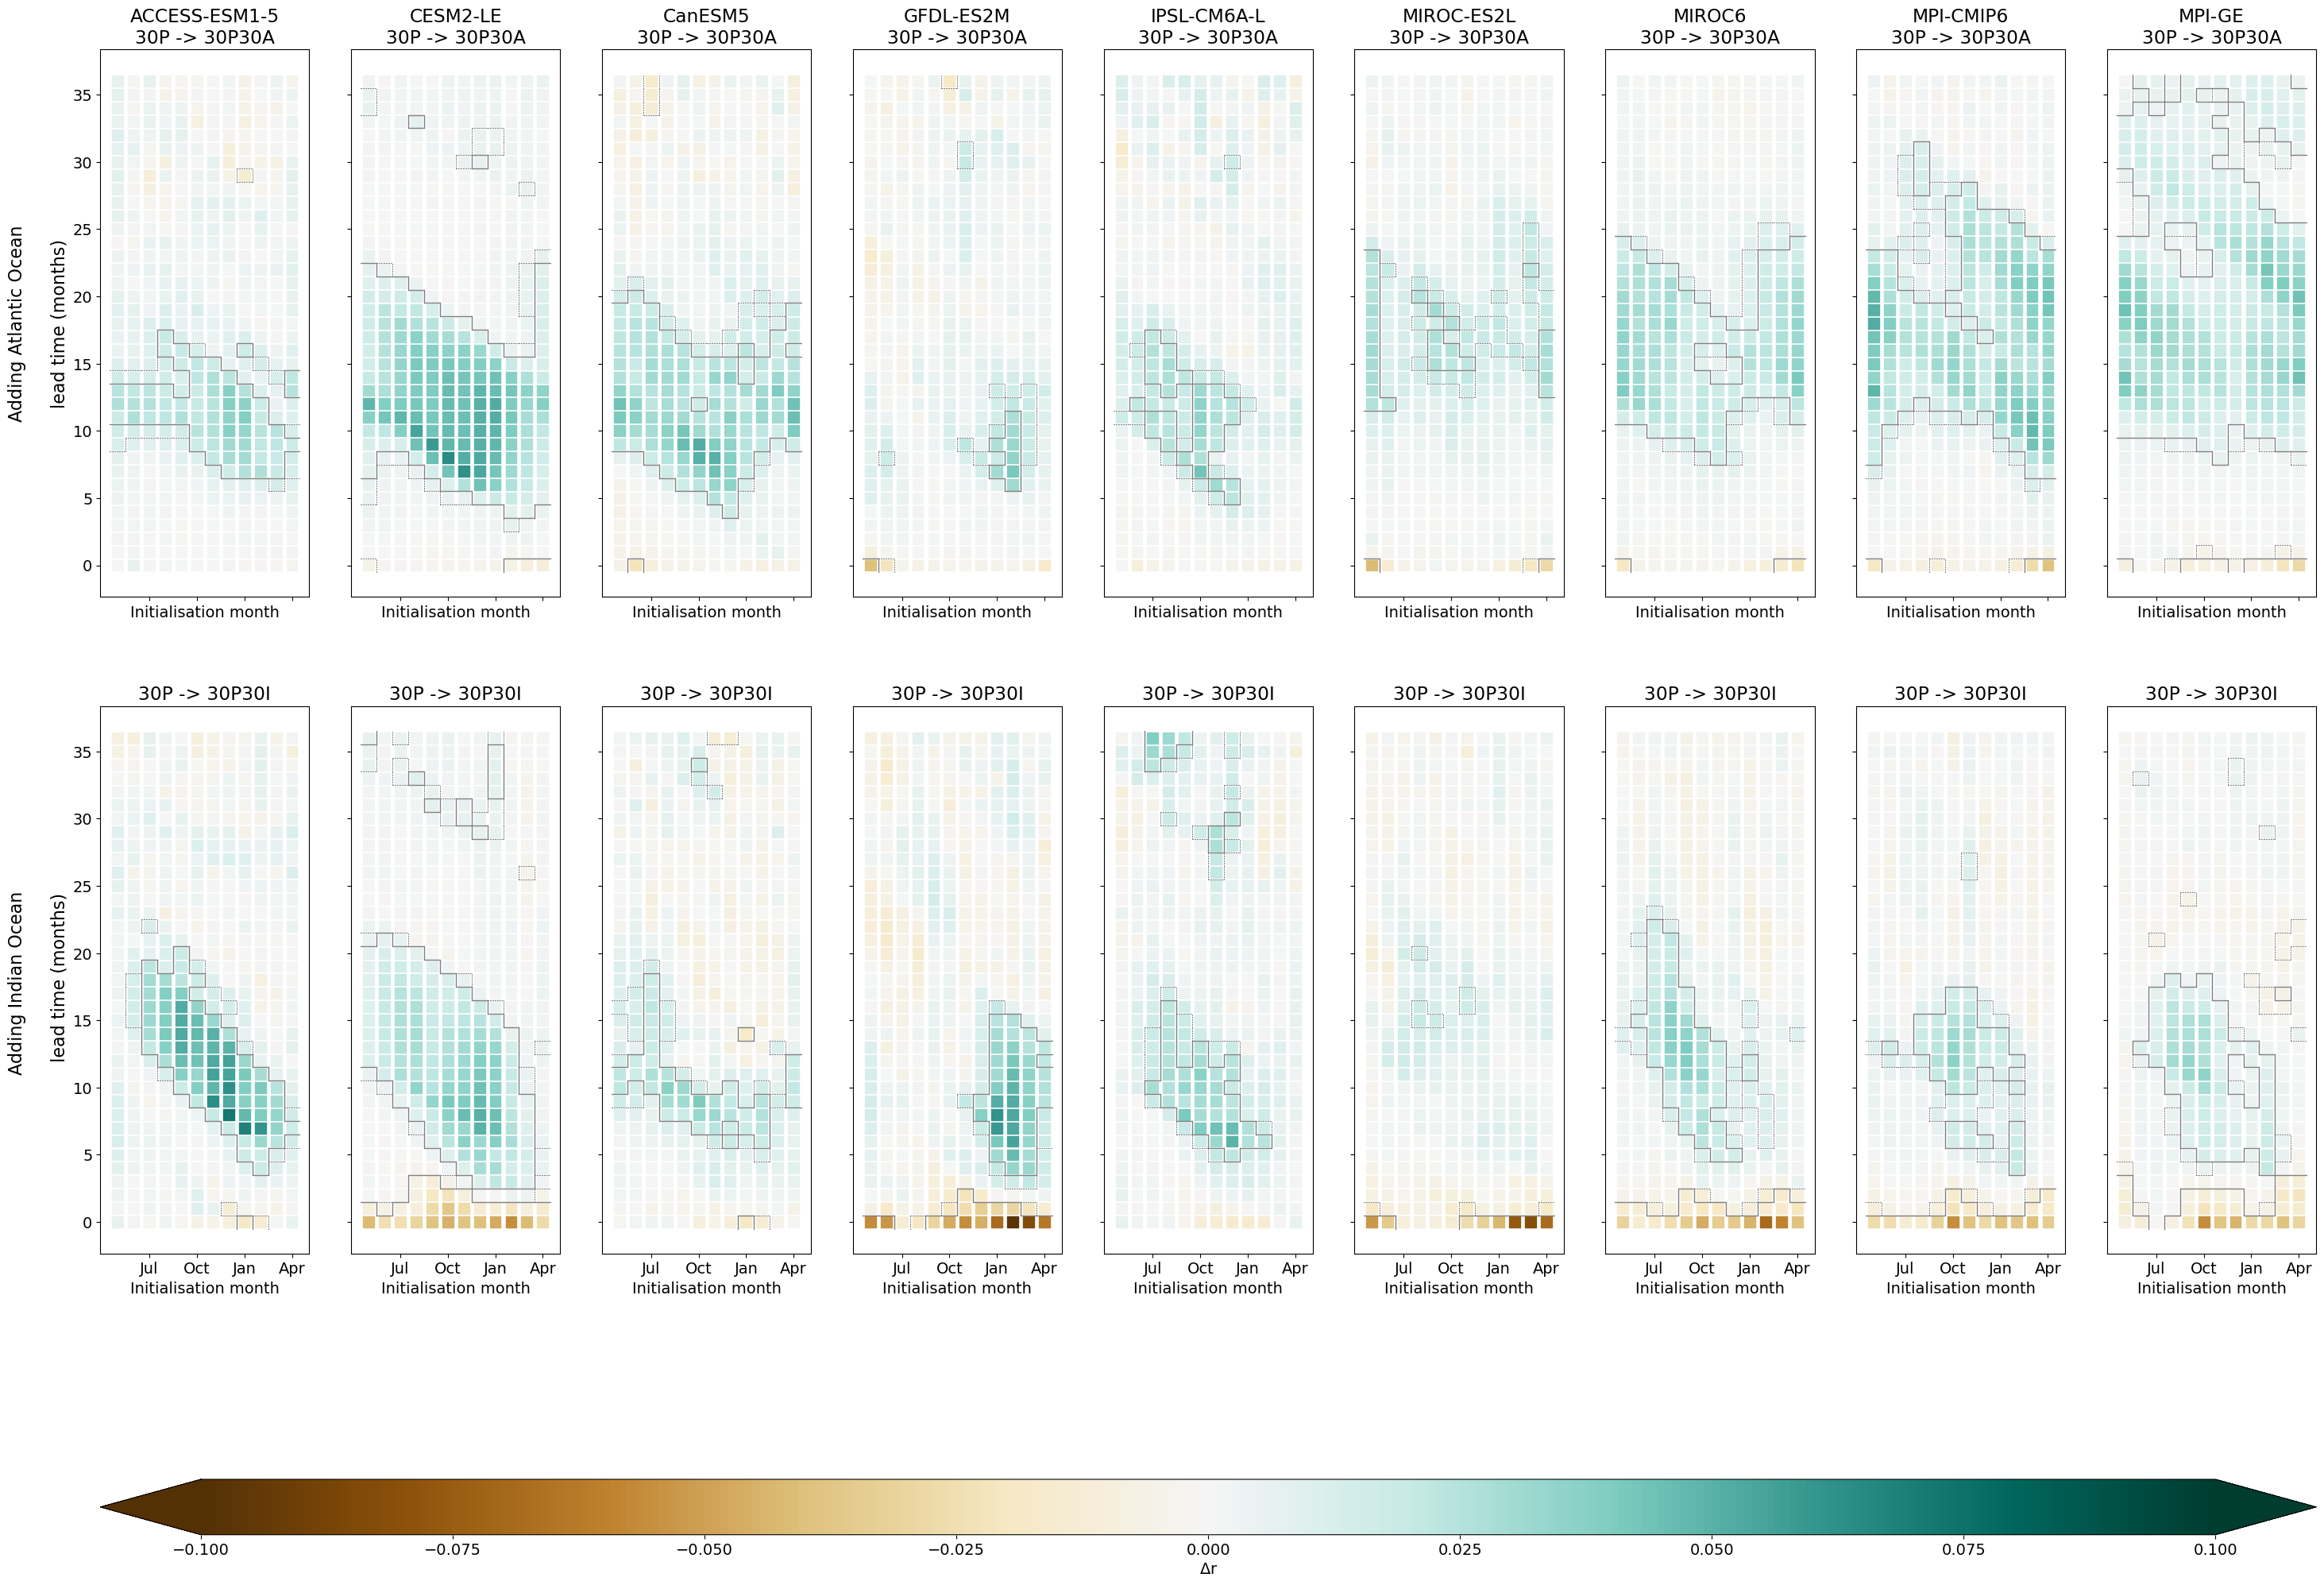

In [69]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino3'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P','30P'),
                     later_mask=('30P30A','30P30I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title)
axs[0,0].set_ylabel('Adding Atlantic Ocean\n\nlead time (months)',size=16)
axs[1,0].set_ylabel('Adding Indian Ocean \n\n lead time (months)',size=16)
plt.savefig('tropics_nino3.pdf')

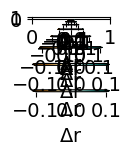

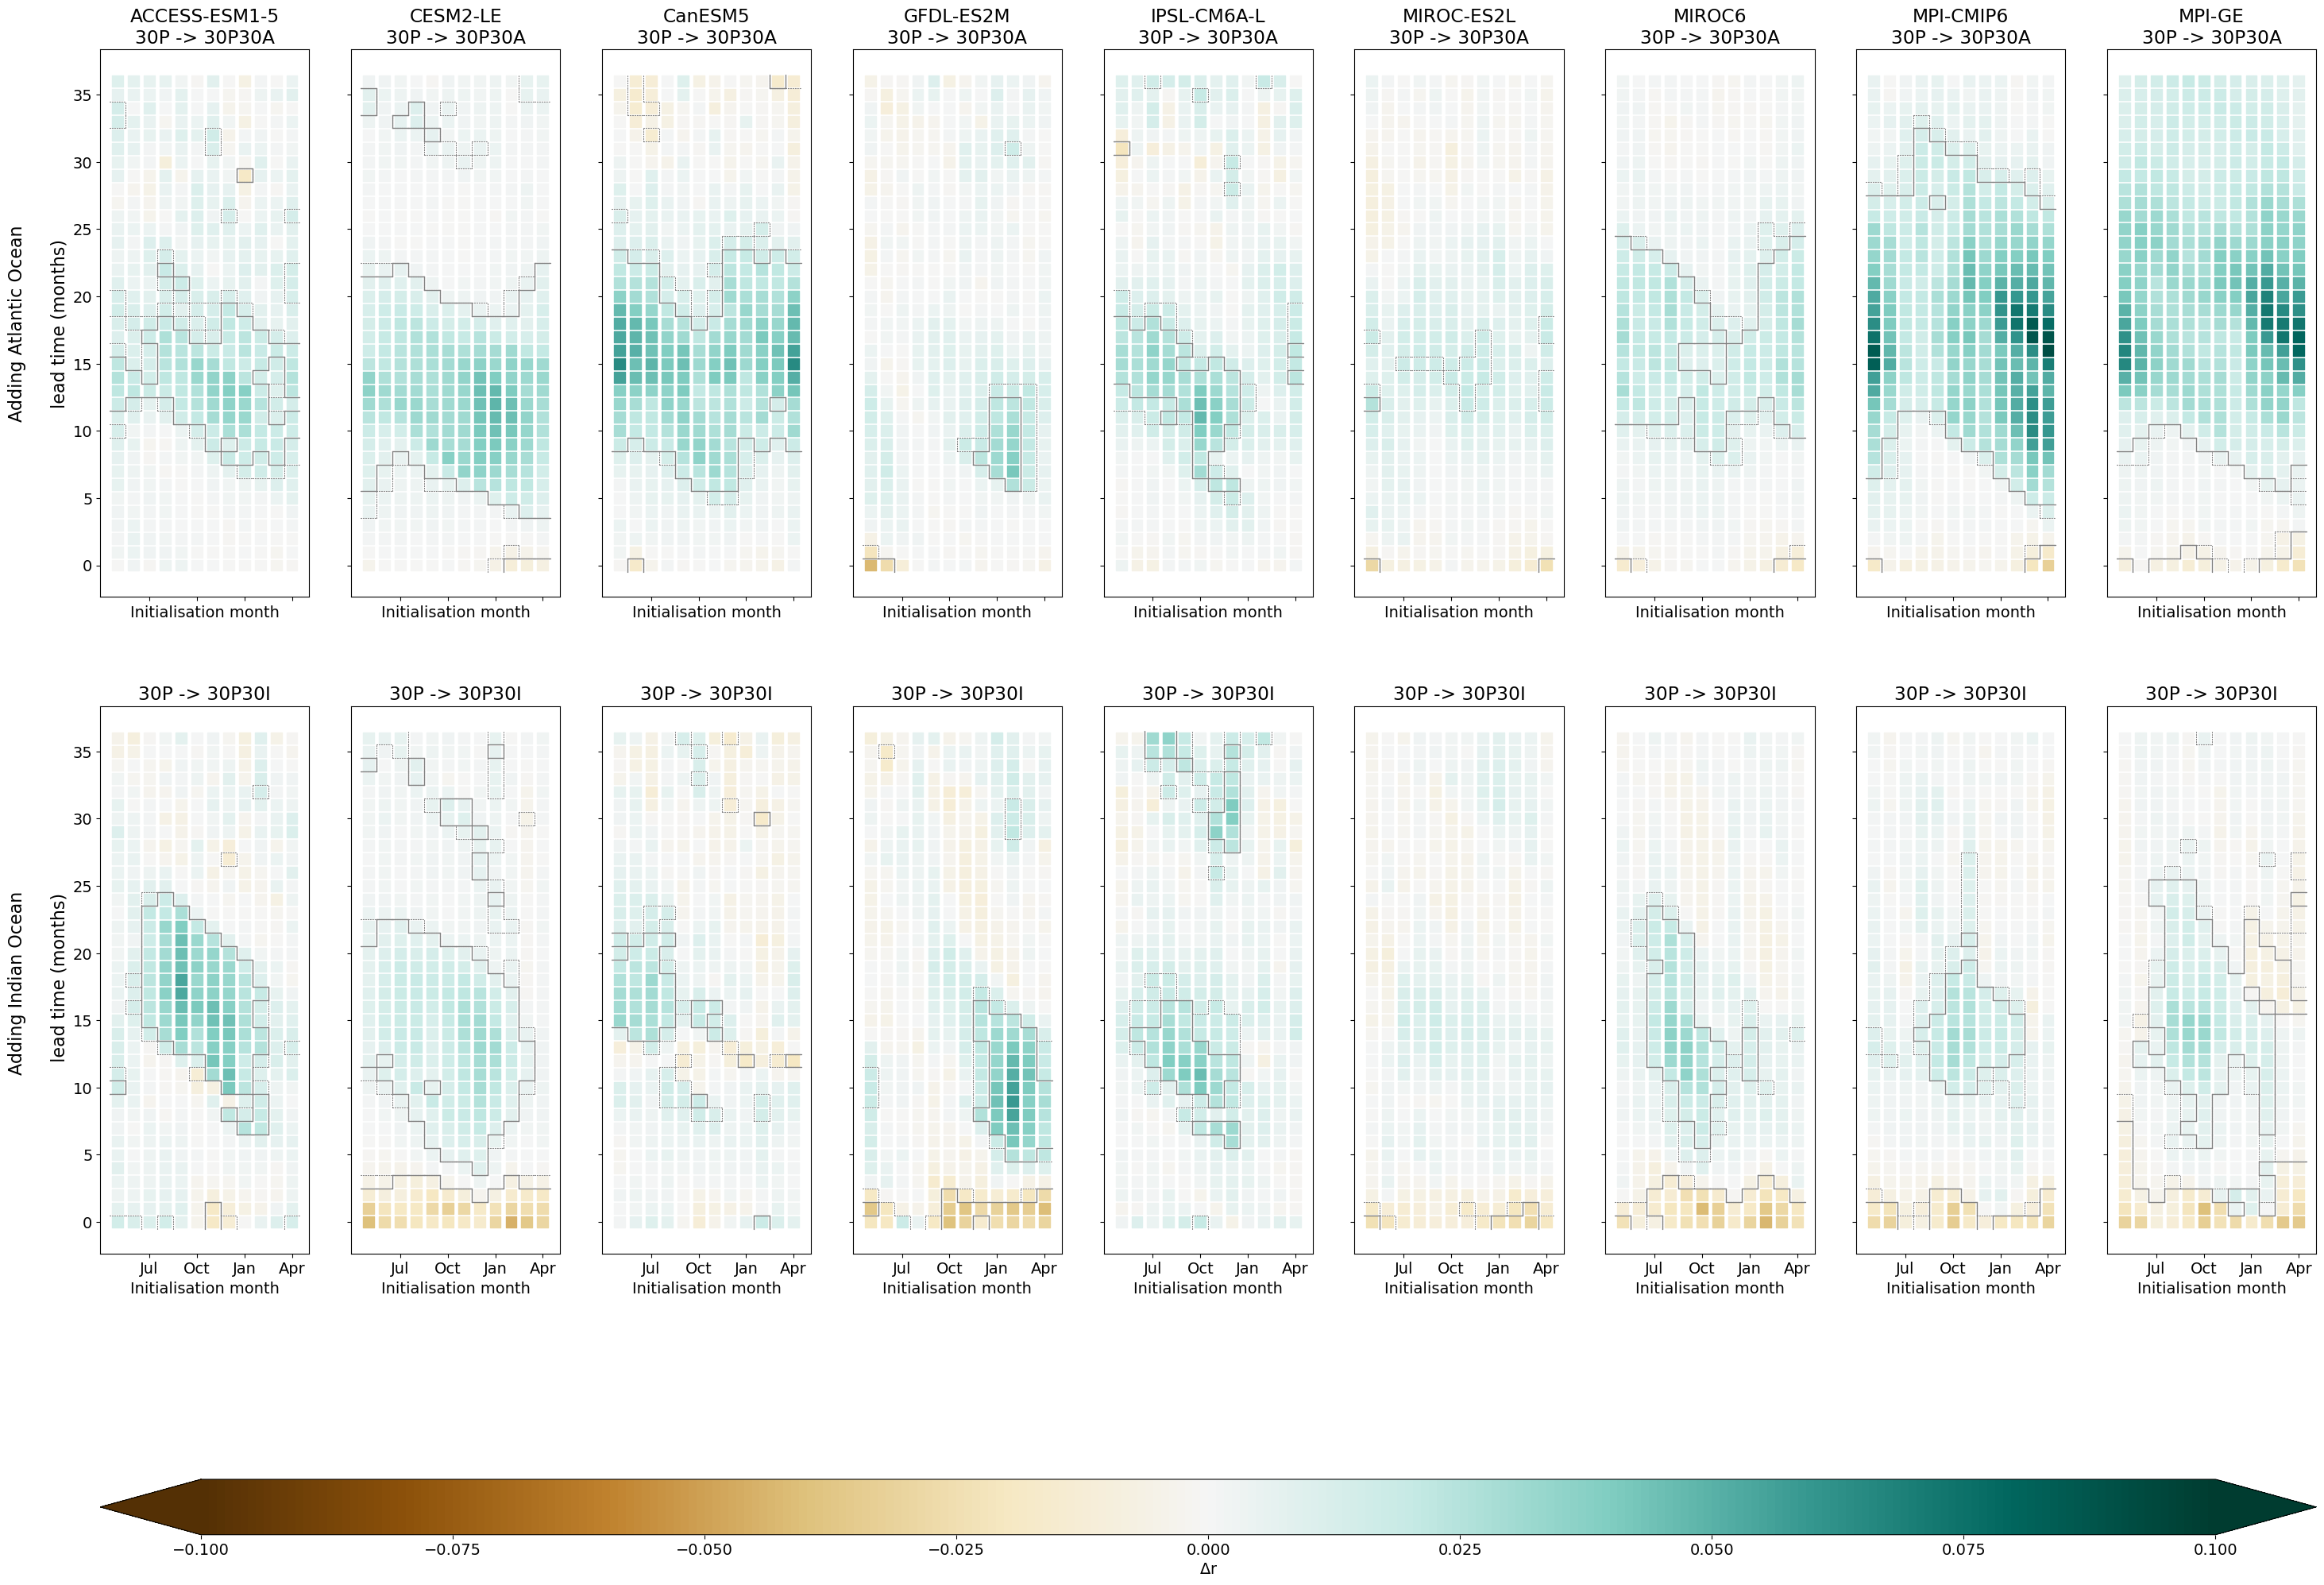

In [70]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino4'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P','30P'),
                     later_mask=('30P30A','30P30I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title)
axs[0,0].set_ylabel('Adding Atlantic Ocean\n\nlead time (months)',size=16)
axs[1,0].set_ylabel('Adding Indian Ocean \n\n lead time (months)',size=16)
plt.savefig('tropics_nino4.pdf')

2024-07-07 20:19:15,331 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


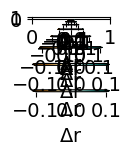

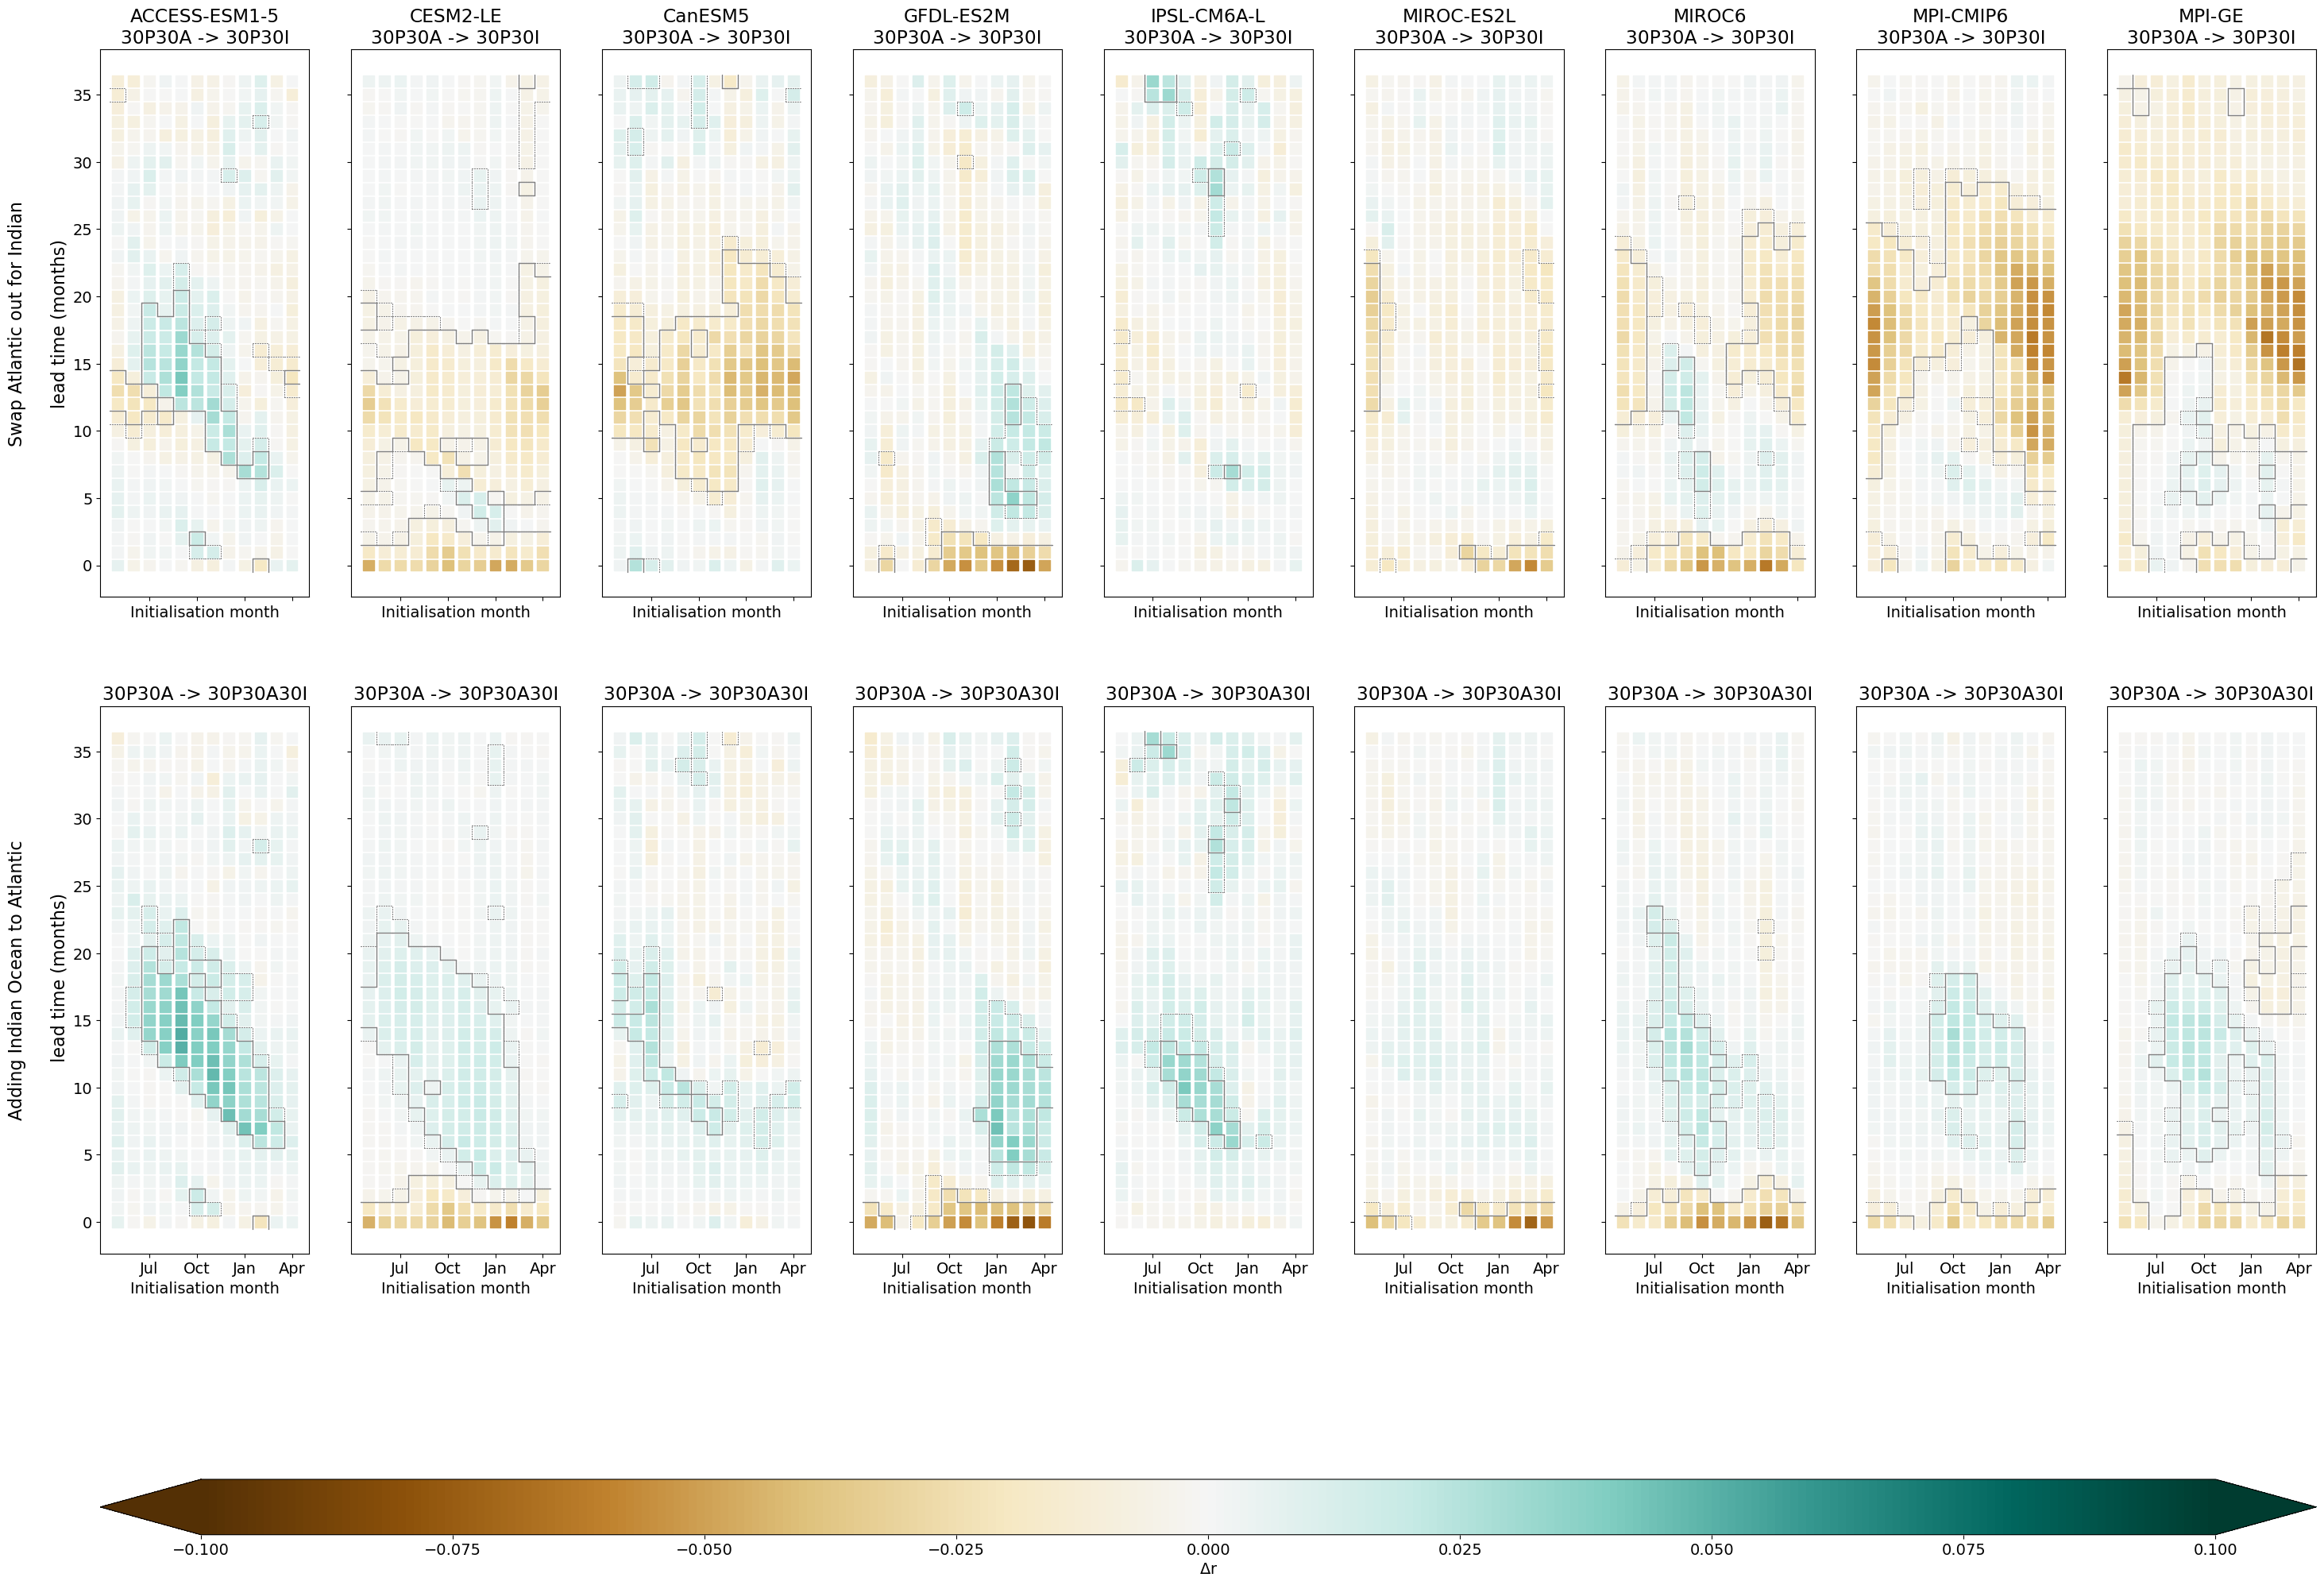

In [8]:
_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
fig, axs = plt.subplots(2,n,figsize=(n*4,8.2*2*1.5),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino34'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
                     start_mask=('30P30A','30P30A'),
                     later_mask=('30P30I','30P30A30I'),
                     fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title)
axs[0,0].set_ylabel('Swap Atlantic out for Indian\n\nlead time (months)',size=16)
axs[1,0].set_ylabel('Adding Indian Ocean to Atlantic\n\n lead time (months)',size=16)
plt.savefig('weird_tropics.pdf')

2024-07-07 20:37:10,460 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Text(0, 0.5, 'Adding Indian Ocean \n\n lead time (months)')

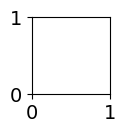

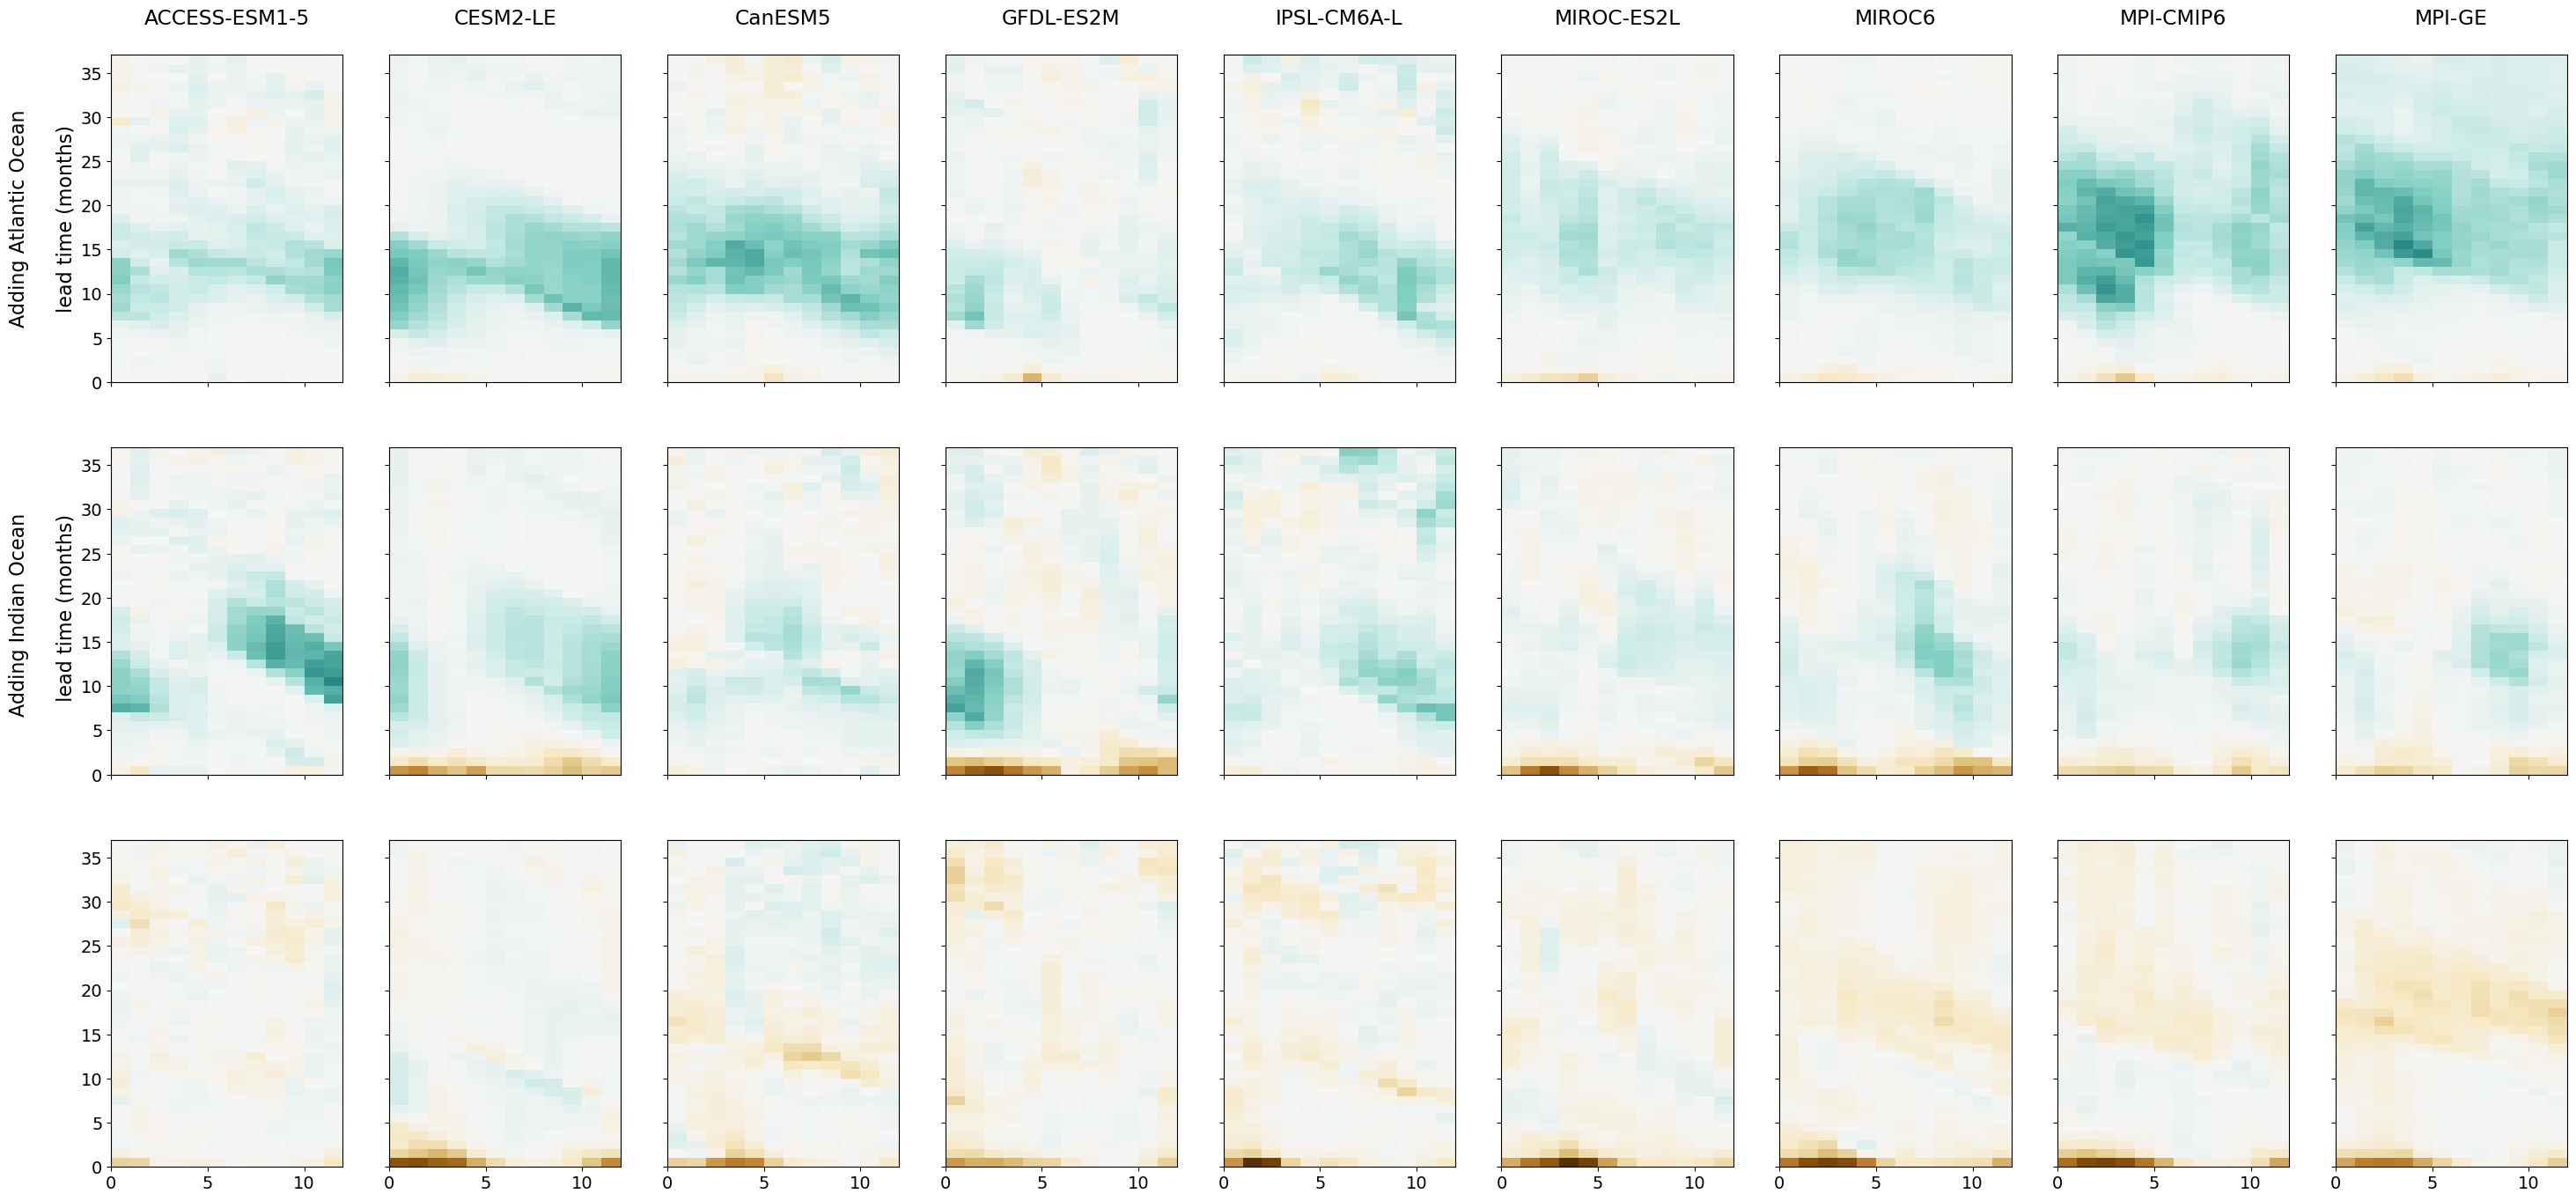

In [15]:
# Nobody said these things had to be square

_,phantom_ax = plt.subplots(1,1,figsize=(1,1))
n=9
h=3
fig, axs = plt.subplots(h,n,figsize=(n*4,8.2*2),sharey=True,sharex=True)
for i,model_name in enumerate(models):
    if i==0:
        cb_axs=axs[:,:]
    else:
        cb_axs=(phantom_ax,phantom_ax)
    for j,m in enumerate(('30P30A','30P30I','60P')):
        plt.sca(axs[j,i])
        thing_to_plot = np.tanh(np.arctanh(r[model_name].sel(index_lon='nino34').sel(mask=m))-np.arctanh(r[model_name].sel(index_lon='nino34').sel(mask='30P')))
        plt.pcolormesh(thing_to_plot.T, vmin=-0.1,vmax=0.1,cmap='BrBG')#,edgecolors='w')
    
    # pt.plot.incremental_sailboat(r[model_name].sel(index_lon='nino4'),N=91*pt.n_ensemble_members[model_name]*((pt.n_ensemble_members[model_name])//5-1),
    #                  start_mask=('30P','30P'),
    #                  later_mask=('30P30A','30P30I'),
    #                  fig=fig,axs=axs[:,i],cb_axs=cb_axs)
    old_title = axs[0,i].get_title()
    axs[0,i].set_title(model_name+'\n'+old_title)
axs[0,0].set_ylabel('Adding Atlantic Ocean\n\nlead time (months)',size=16)
axs[1,0].set_ylabel('Adding Indian Ocean \n\n lead time (months)',size=16)